In [1]:
import pickle
import matplotlib.pyplot as plt

from utils import load_tuning_results, load_PCA_test_sets
from post_processing import best_PCA, get_training_times, get_training_rand_scores, get_best_estimators, execute_estimators, get_testing_times, get_testing_rand_scores, get_n_clusters_testing, get_labels
from plot import plot_rand_score_vs_PCA, plot_training_time_vs_PCA, plot_clusters, plot_testing_time_vs_PCA, plot_images_per_cluster

PCA_DIMENSIONS = list(range(10,200+10,10))
PCA_DIMENSIONS.insert(0,2)
DATASET_PERC = 0.5

Loading the results of the tuning phase.

In [2]:
gaussian_mixture = load_tuning_results("GaussianMixture")
gaussian_mixture

{2: (GaussianMixture(covariance_type='diag', max_iter=200, n_components=15,
                  random_state=1),
  {'init_params': 'kmeans', 'n_components': 15},
  0.8400201949327688,
  3.9186580181121826),
 10: (GaussianMixture(covariance_type='diag', max_iter=200, n_components=15,
                  random_state=1),
  {'init_params': 'kmeans', 'n_components': 15},
  0.8381433291659224,
  3.761091709136963),
 20: (GaussianMixture(covariance_type='diag', max_iter=200, n_components=15,
                  random_state=1),
  {'init_params': 'kmeans', 'n_components': 15},
  0.836537366366443,
  5.675739049911499),
 30: (GaussianMixture(covariance_type='diag', max_iter=200, n_components=15,
                  random_state=1),
  {'init_params': 'kmeans', 'n_components': 15},
  0.8268075549205216,
  9.239535093307495),
 40: (GaussianMixture(covariance_type='diag', max_iter=200, n_components=15,
                  random_state=1),
  {'init_params': 'kmeans', 'n_components': 15},
  0.8253790983083714

Now we search for the PCA dimension corresponding to the best rand score.

Recall: gaussian_mixture is a dictionary in the following form:
- the keys are the values of the PCA dimension;
- the values are tuples containing (best estimator, Dict['init_params' : value, 'n_components' : value], rand score, training time).

In [3]:
best_PCA(gaussian_mixture)

The best PCA dimension is 2, with hyperparameters =  {'init_params': 'kmeans', 'n_components': 15}


In [4]:
training_rand_scores = get_training_rand_scores(gaussian_mixture)
training_rand_scores

[0.8400201949327688,
 0.8381433291659224,
 0.836537366366443,
 0.8268075549205216,
 0.8253790983083714,
 0.829305386165897,
 0.8123056923430203,
 0.8080209986477177,
 0.8073052330773353,
 0.8093471155563494,
 0.8065711861812058,
 0.8051912458857448,
 0.7940182558109866,
 0.7958826065879111,
 0.8010642589237873,
 0.8039746128135125,
 0.7942966090883576,
 0.8029099073814201,
 0.7871586890516163,
 0.7967951547470211,
 0.8268062026382262]

In [5]:
training_times = get_training_times(gaussian_mixture)
training_times

[3.9186580181121826,
 3.761091709136963,
 5.675739049911499,
 9.239535093307495,
 11.173529148101807,
 12.111986875534058,
 14.538506269454956,
 15.789168119430542,
 18.014696836471558,
 17.140658140182495,
 23.159069061279297,
 22.71049404144287,
 24.612951040267944,
 25.553850889205933,
 30.490458250045776,
 34.351104974746704,
 37.836660861968994,
 40.00985503196716,
 38.13011622428894,
 41.53184795379639,
 43.720927000045776]

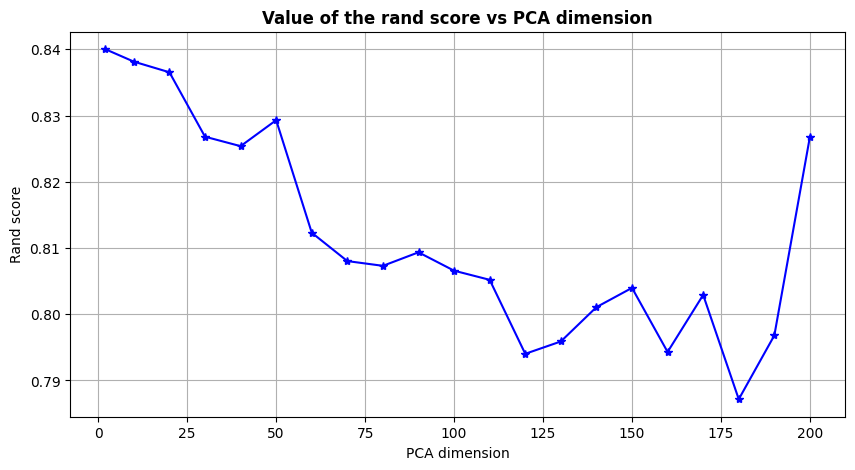

In [6]:
plot_rand_score_vs_PCA(PCA_DIMENSIONS, training_rand_scores, "train", "GaussianMixture")

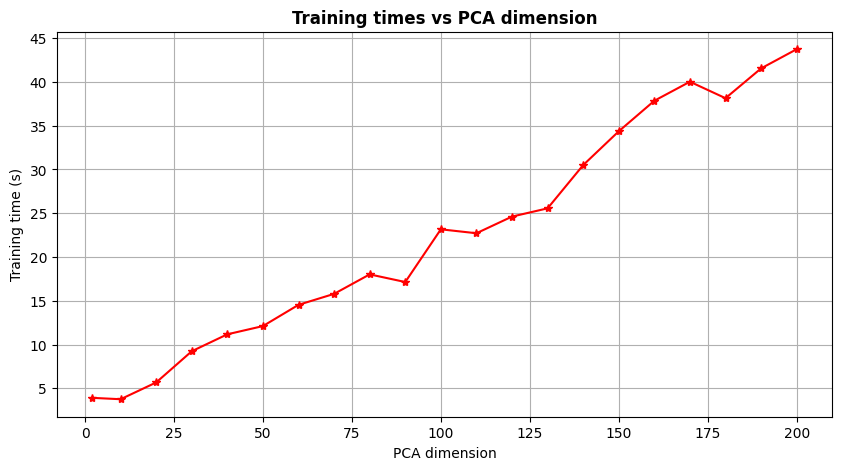

In [7]:
plot_training_time_vs_PCA(PCA_DIMENSIONS, training_times, "GaussianMixture")

In [8]:
best_estimators = get_best_estimators(gaussian_mixture)

In [9]:
testing_results = execute_estimators(best_estimators, "GaussianMixture", PCA_DIMENSIONS, DATASET_PERC)
testing_results

Executing GaussianMixture ..: 100%|██████████| 21/21 [00:11<00:00,  1.91it/s]


{2: (0.8410537831935174,
  0.012199878692626953,
  15,
  array([13, 13, 14, ...,  9,  0, 12])),
 10: (0.8371988243218419,
  0.2224259376525879,
  15,
  array([13,  7,  9, ...,  2,  1,  6])),
 20: (0.8412701814544935,
  0.34450793266296387,
  15,
  array([5, 8, 9, ..., 6, 5, 9])),
 30: (0.8392798971281612,
  0.44193482398986816,
  15,
  array([11, 11, 10, ...,  7,  0,  1])),
 40: (0.8197131835160125,
  0.34975385665893555,
  15,
  array([ 7,  4,  0, ..., 14, 13, 10])),
 50: (0.8223929949176413,
  0.20900607109069824,
  15,
  array([11,  2,  7, ...,  2,  0,  0])),
 60: (0.8072954503704611,
  0.5427849292755127,
  15,
  array([9, 4, 5, ..., 5, 4, 5])),
 70: (0.8270443124527994,
  0.3908989429473877,
  15,
  array([ 0,  6, 11, ...,  9,  8,  9])),
 80: (0.8100429857326557,
  0.7559738159179688,
  15,
  array([12, 13,  2, ...,  7,  9, 13])),
 90: (0.8159216214561263,
  0.2819483280181885,
  15,
  array([ 0,  5,  4, ...,  5,  5, 10])),
 100: (0.7942315841038515,
  0.1960163116455078,
  15,
  

In [10]:
testing_rand_scores = get_testing_rand_scores(testing_results)
testing_rand_scores

[0.8410537831935174,
 0.8371988243218419,
 0.8412701814544935,
 0.8392798971281612,
 0.8197131835160125,
 0.8223929949176413,
 0.8072954503704611,
 0.8270443124527994,
 0.8100429857326557,
 0.8159216214561263,
 0.7942315841038515,
 0.8173916681974976,
 0.7926623803400485,
 0.7962001102198273,
 0.788923233931378,
 0.7873877084481457,
 0.7901438164635765,
 0.7963220868287306,
 0.8060072663441716,
 0.8080468638376911,
 0.8202397485355051]

In [11]:
testing_times = get_testing_times(testing_results)
testing_times

[0.012199878692626953,
 0.2224259376525879,
 0.34450793266296387,
 0.44193482398986816,
 0.34975385665893555,
 0.20900607109069824,
 0.5427849292755127,
 0.3908989429473877,
 0.7559738159179688,
 0.2819483280181885,
 0.1960163116455078,
 0.28316307067871094,
 0.18187189102172852,
 0.5041189193725586,
 0.39754700660705566,
 1.2169380187988281,
 1.3064839839935303,
 0.6125690937042236,
 0.5705490112304688,
 0.7383129596710205,
 0.7316899299621582]

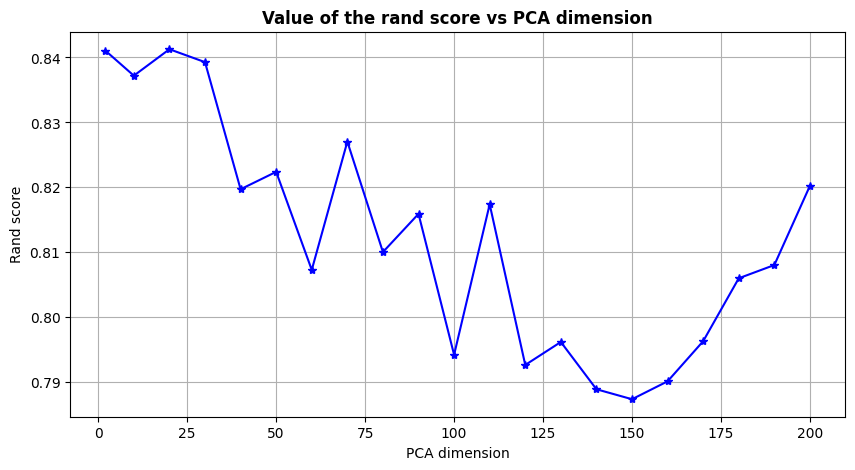

In [12]:
plot_rand_score_vs_PCA(PCA_DIMENSIONS, testing_rand_scores, "test", "GaussianMixture")

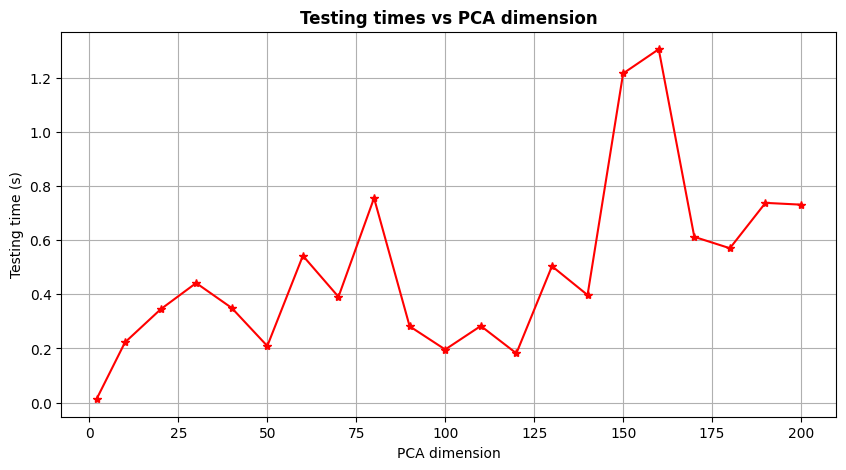

In [13]:
plot_testing_time_vs_PCA(PCA_DIMENSIONS, testing_times, "GaussianMixture")

In [14]:
labels = get_labels(testing_results)
labels

[array([13, 13, 14, ...,  9,  0, 12]),
 array([13,  7,  9, ...,  2,  1,  6]),
 array([5, 8, 9, ..., 6, 5, 9]),
 array([11, 11, 10, ...,  7,  0,  1]),
 array([ 7,  4,  0, ..., 14, 13, 10]),
 array([11,  2,  7, ...,  2,  0,  0]),
 array([9, 4, 5, ..., 5, 4, 5]),
 array([ 0,  6, 11, ...,  9,  8,  9]),
 array([12, 13,  2, ...,  7,  9, 13]),
 array([ 0,  5,  4, ...,  5,  5, 10]),
 array([10,  0,  1, ...,  2,  8,  8]),
 array([ 3,  9,  2, ...,  7, 12, 10]),
 array([ 5,  7,  0, ..., 14,  3,  0]),
 array([3, 5, 5, ..., 3, 3, 3]),
 array([ 6,  5, 11, ..., 13, 11,  0]),
 array([ 5, 12,  3, ...,  1,  1,  0]),
 array([ 1,  8, 12, ..., 12,  1,  2]),
 array([ 2, 13, 13, ...,  2,  8,  1]),
 array([ 1, 11, 11, ..., 11,  5,  4]),
 array([ 3,  5, 14, ...,  2, 14, 14]),
 array([ 0, 11, 11, ...,  1,  2, 11])]

In [15]:
n_clusters = get_n_clusters_testing(testing_results)
n_clusters

[15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 14,
 15,
 15,
 15]

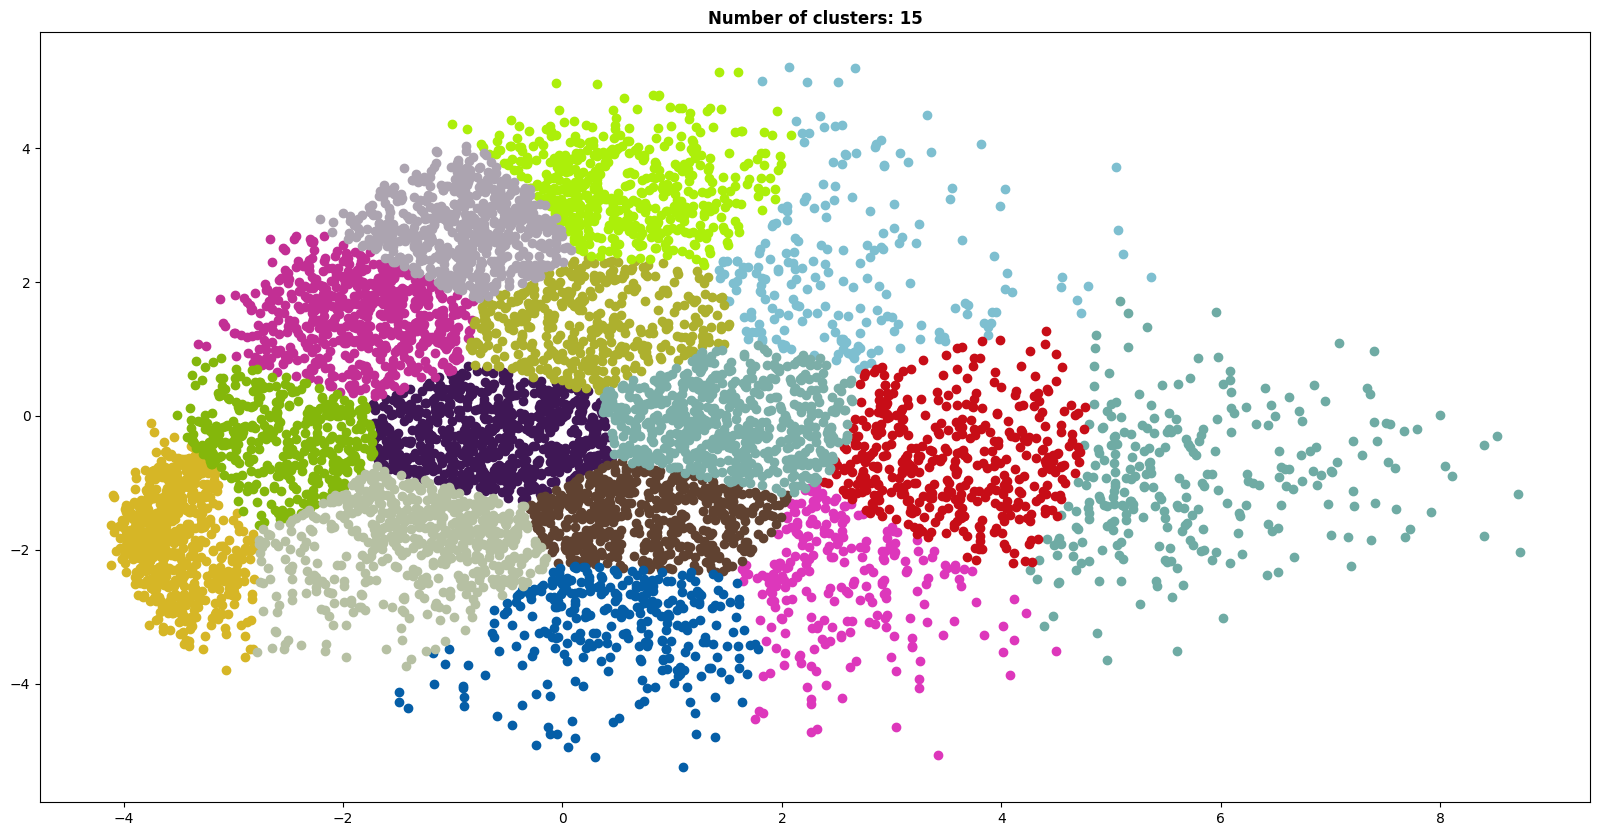

In [16]:
plot_clusters(DATASET_PERC, n_clusters[0], labels[0], "GaussianMixture")

Loading the PCA testing datasets..: 100%|██████████| 21/21 [00:00<00:00, 52.36it/s]
/Users/nicolaaggio/Desktop/UNI/Clustering/plot.py:124: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/Users/nicolaaggio/Desktop/UNI/Clustering/plot.py:90: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig,axs = plt.subplots(n_clusters, 4, figsize = (4*2, n_clusters*2))


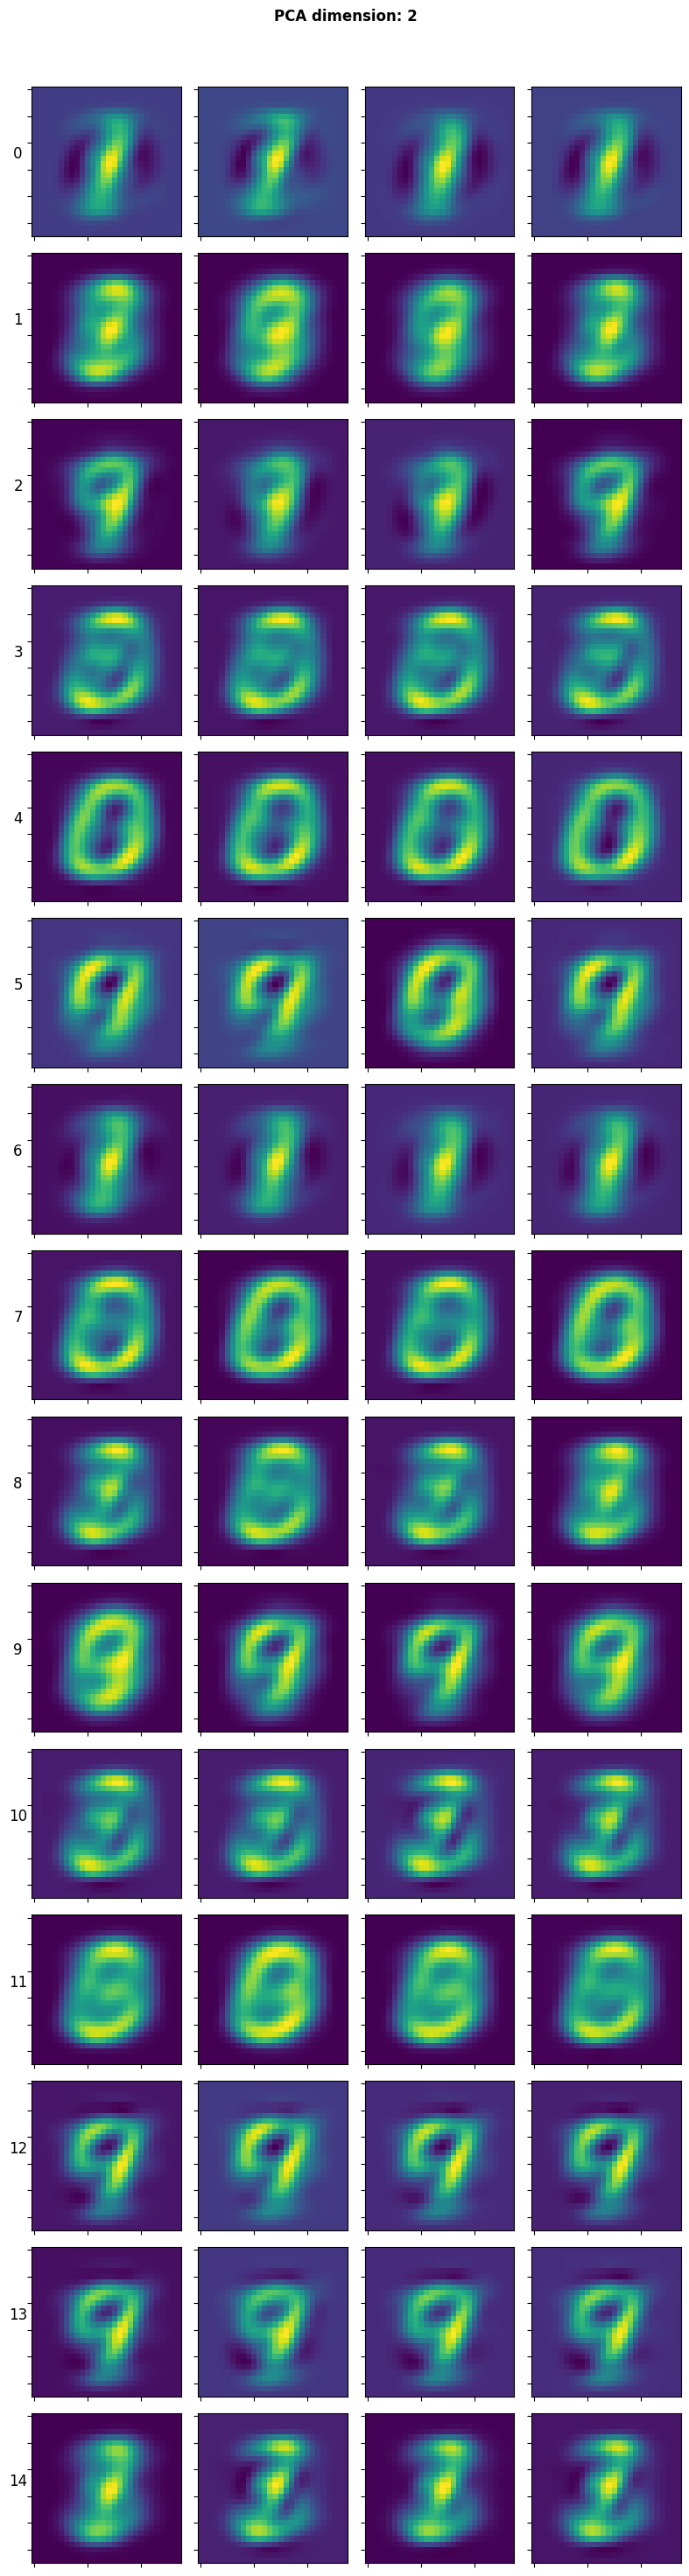

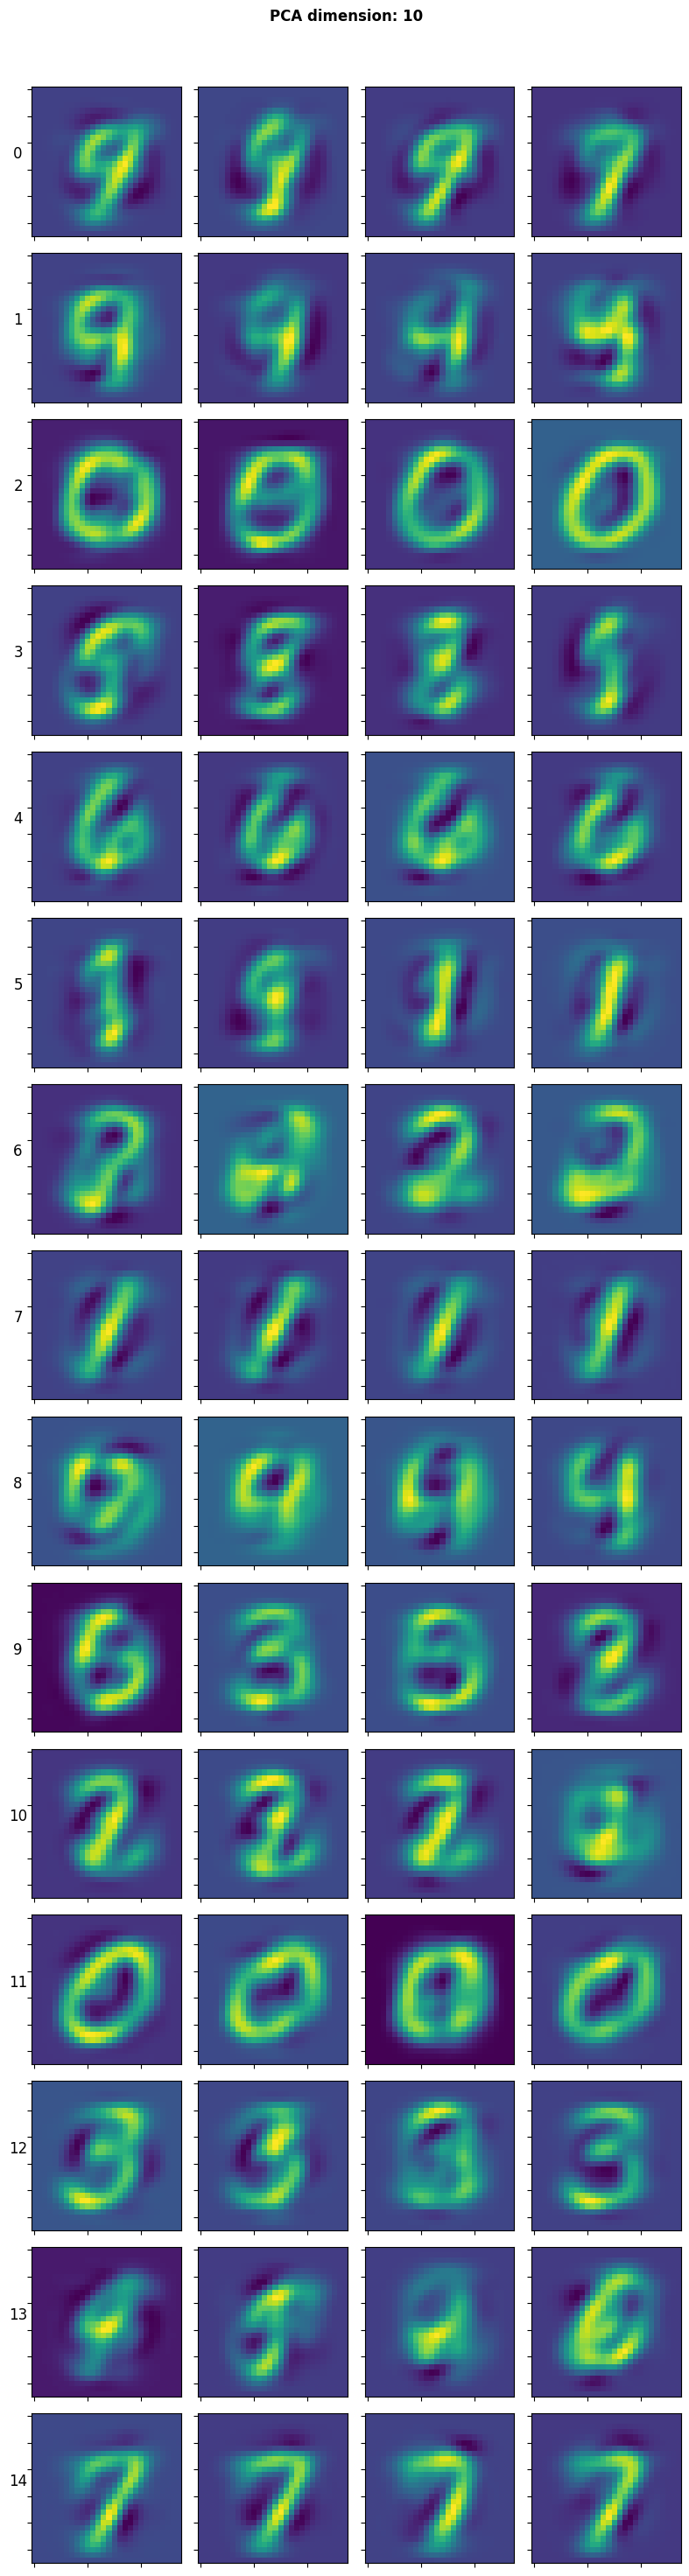

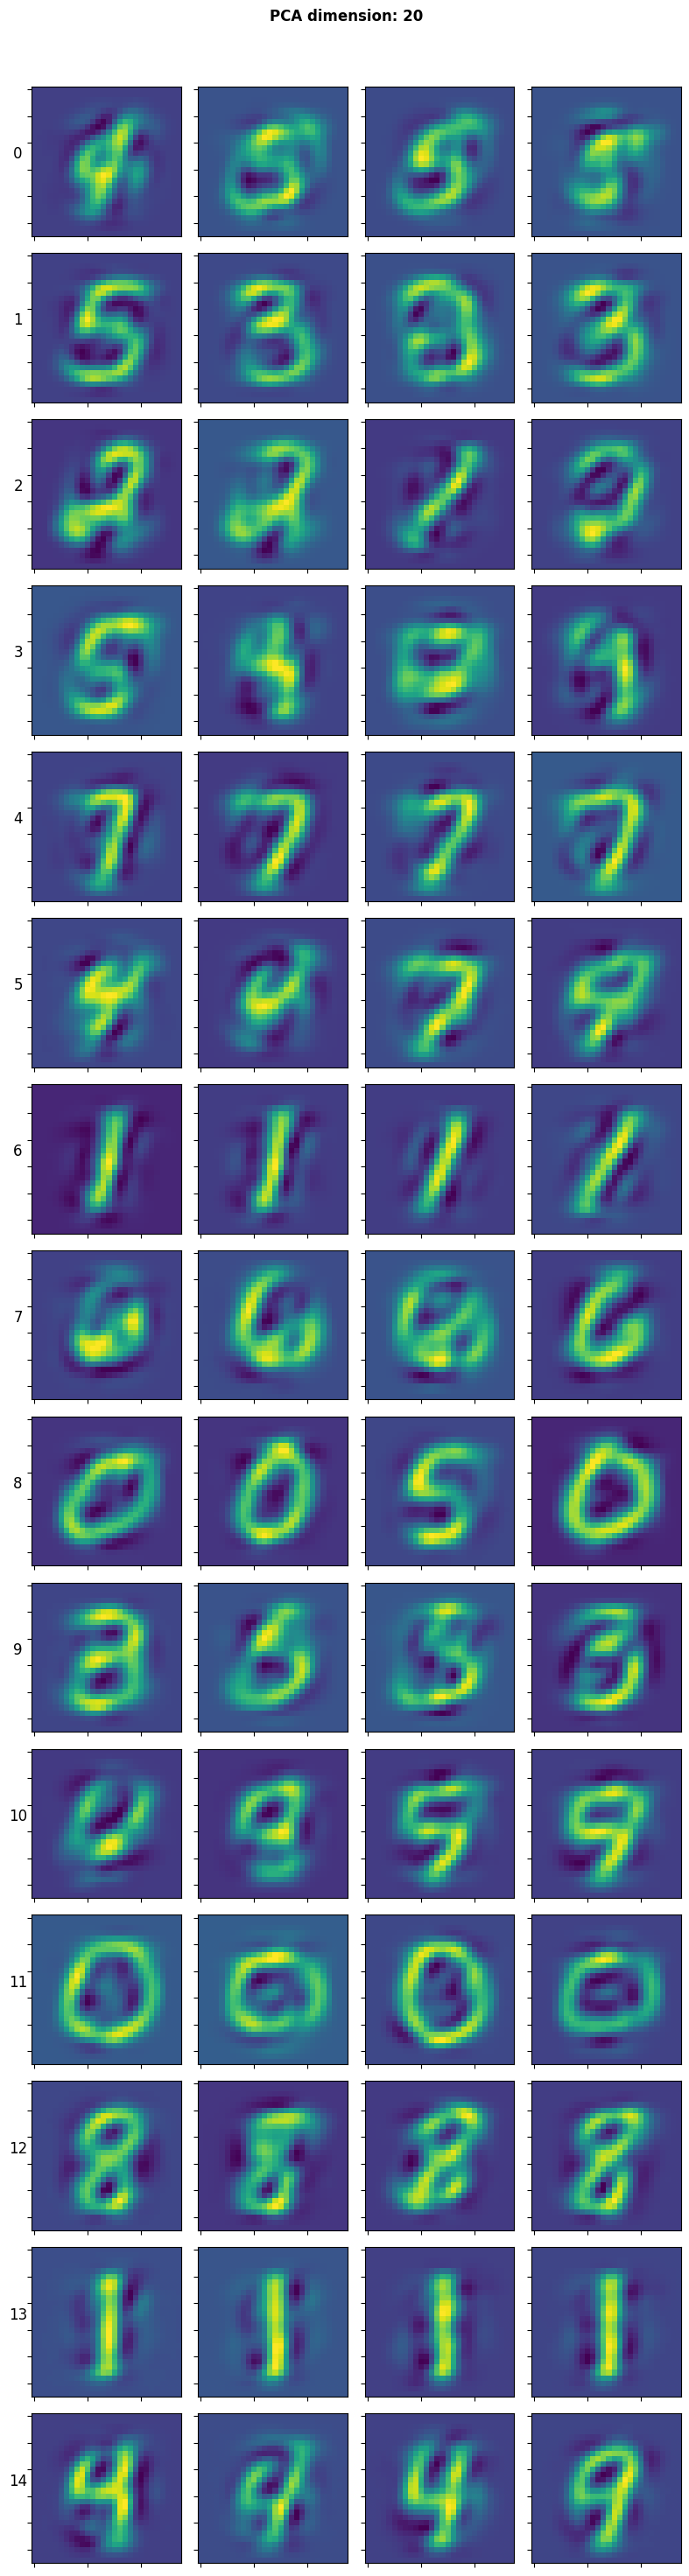

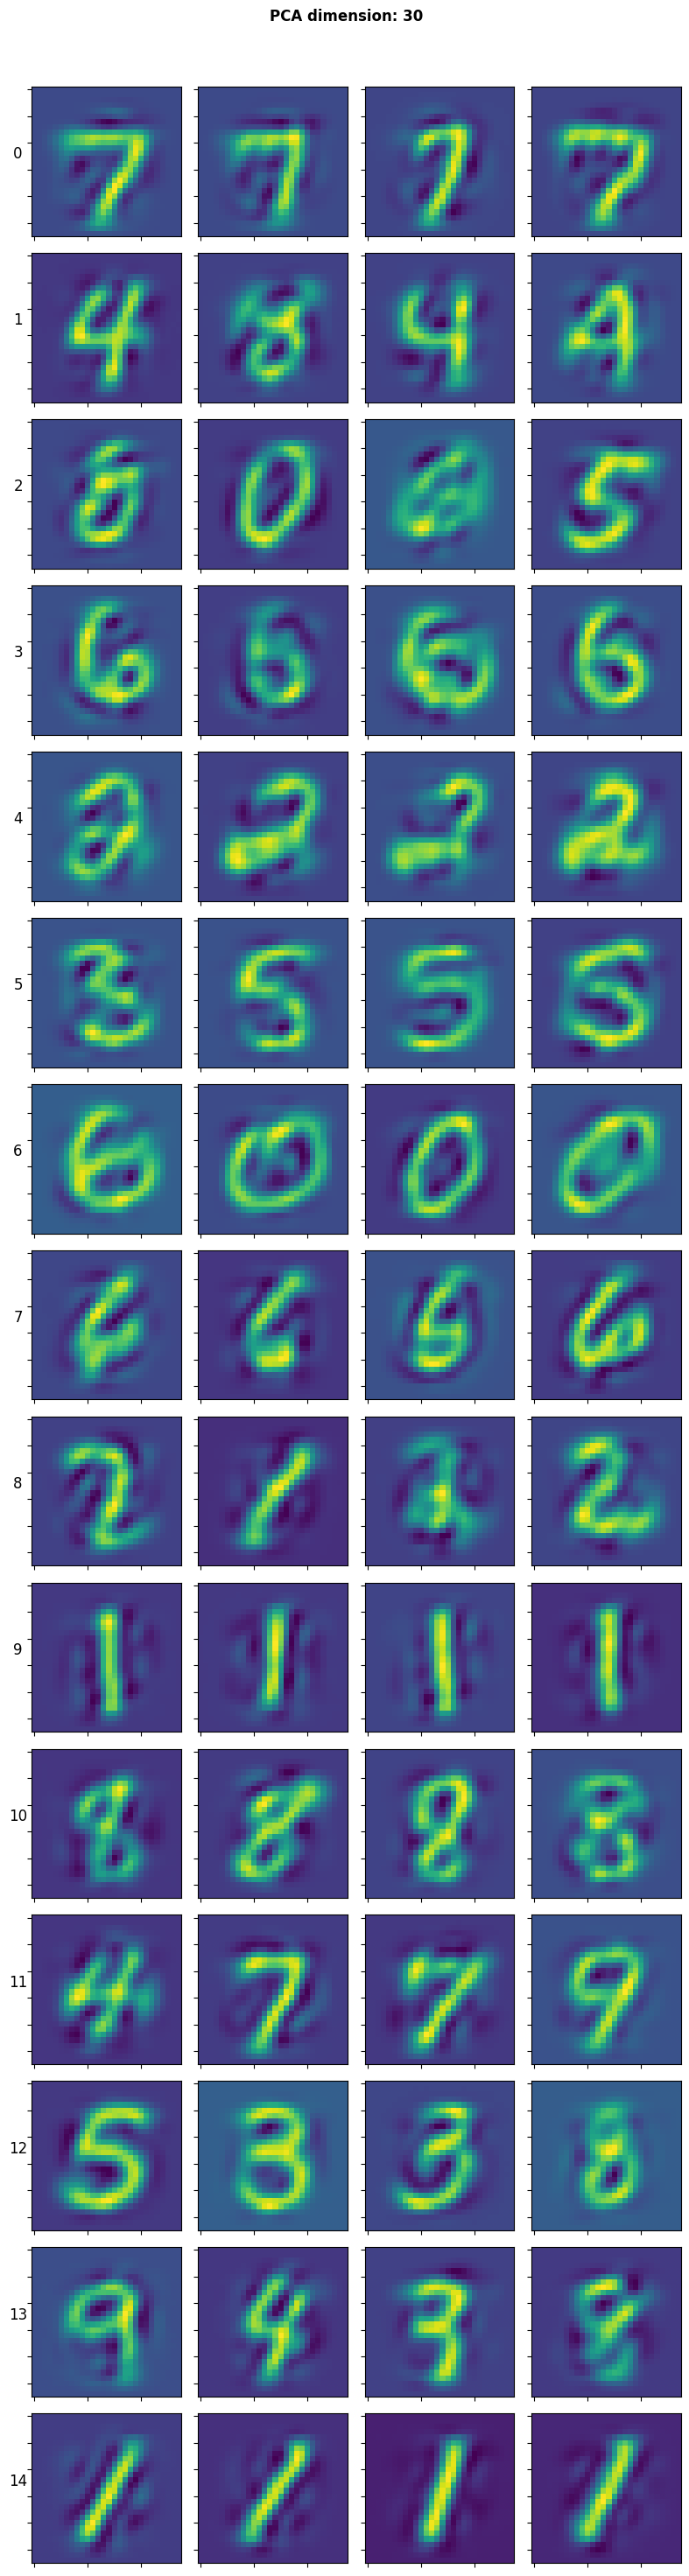

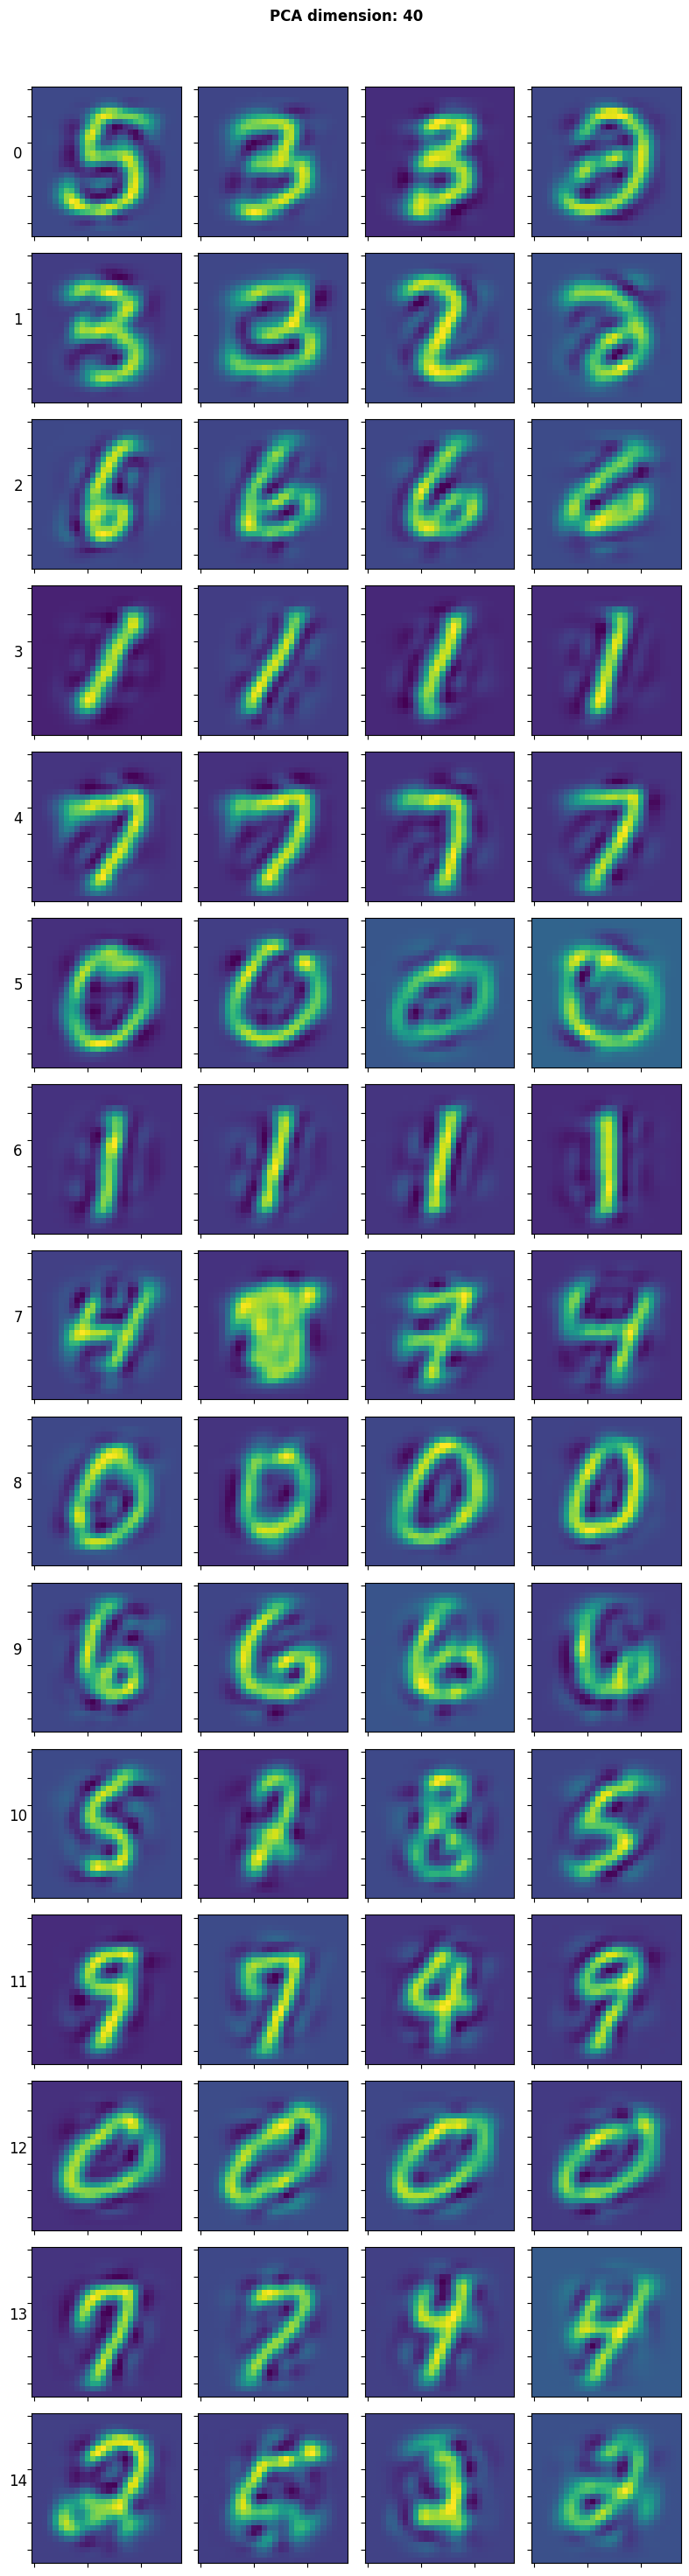

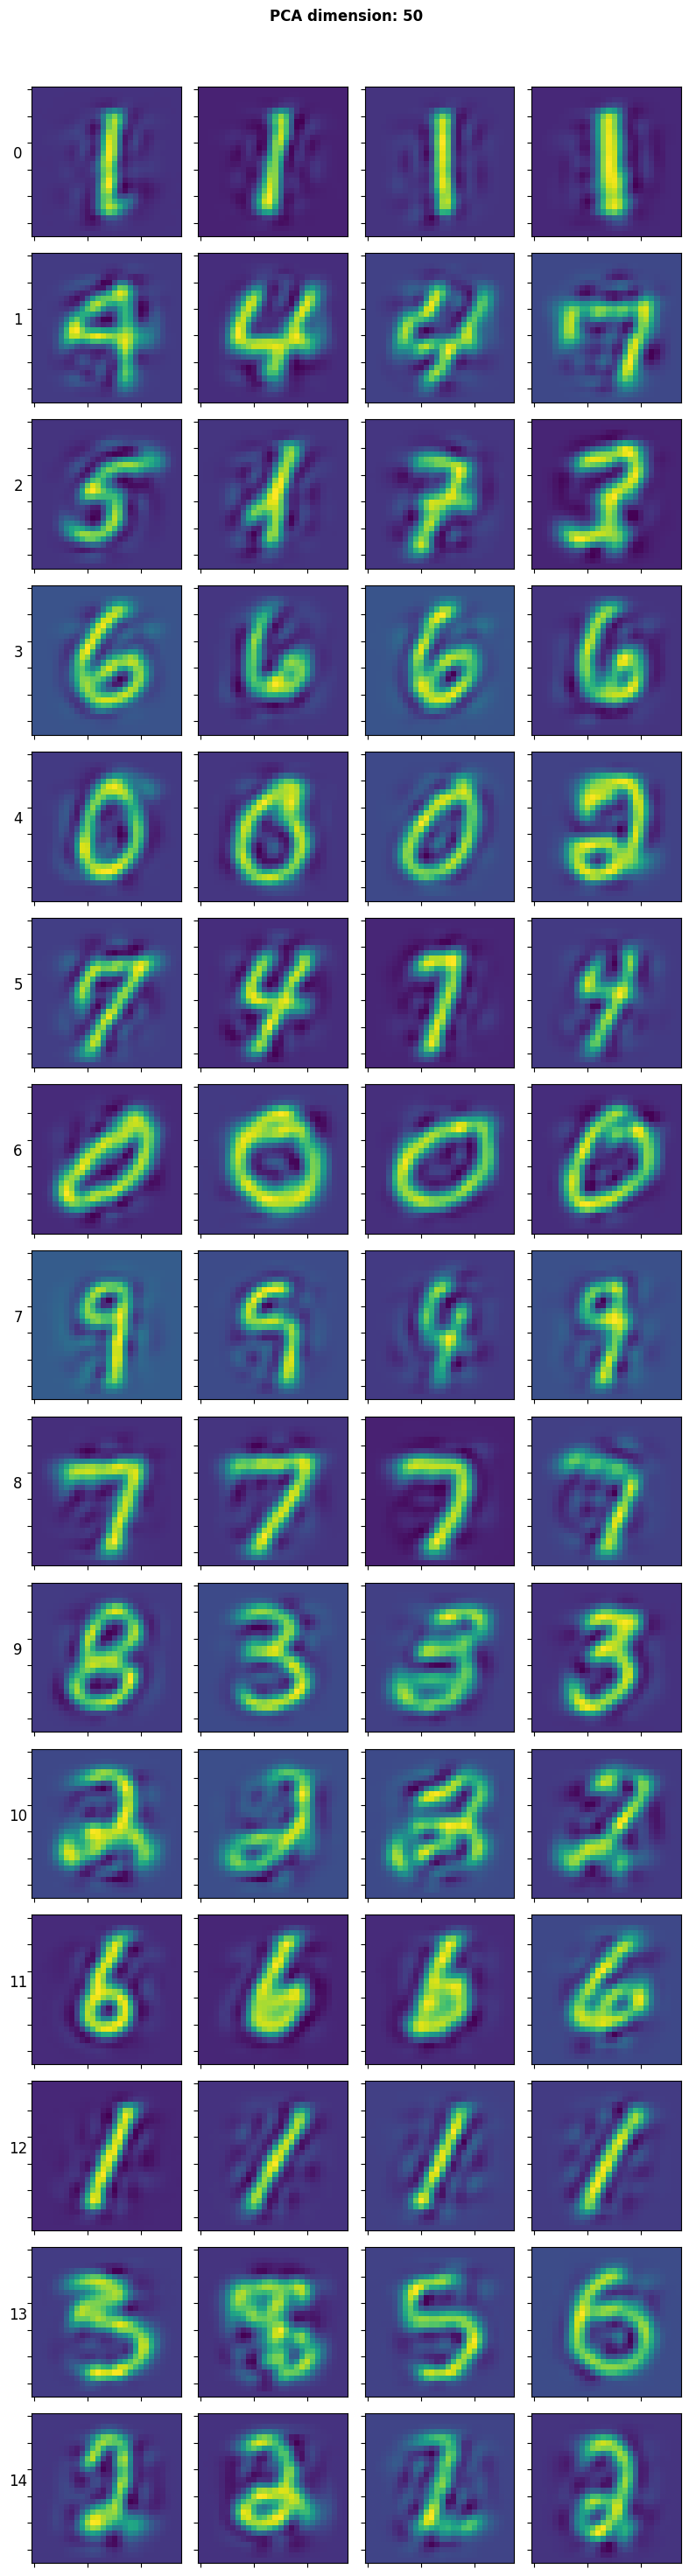

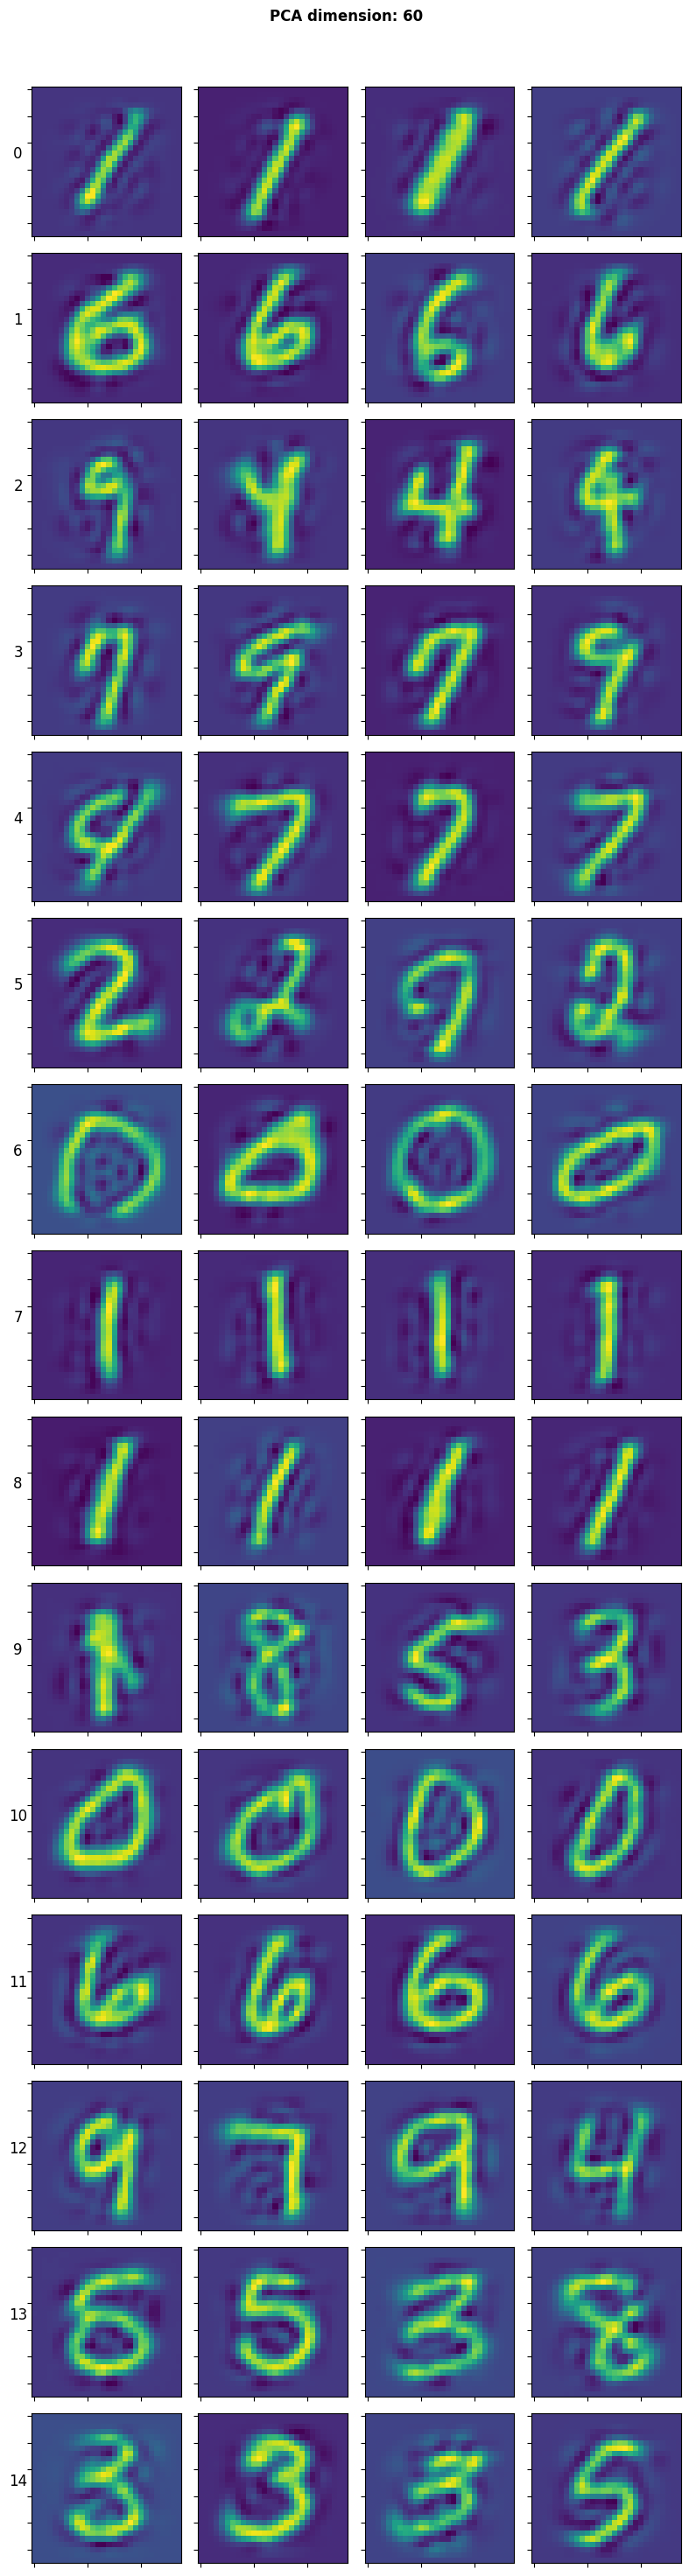

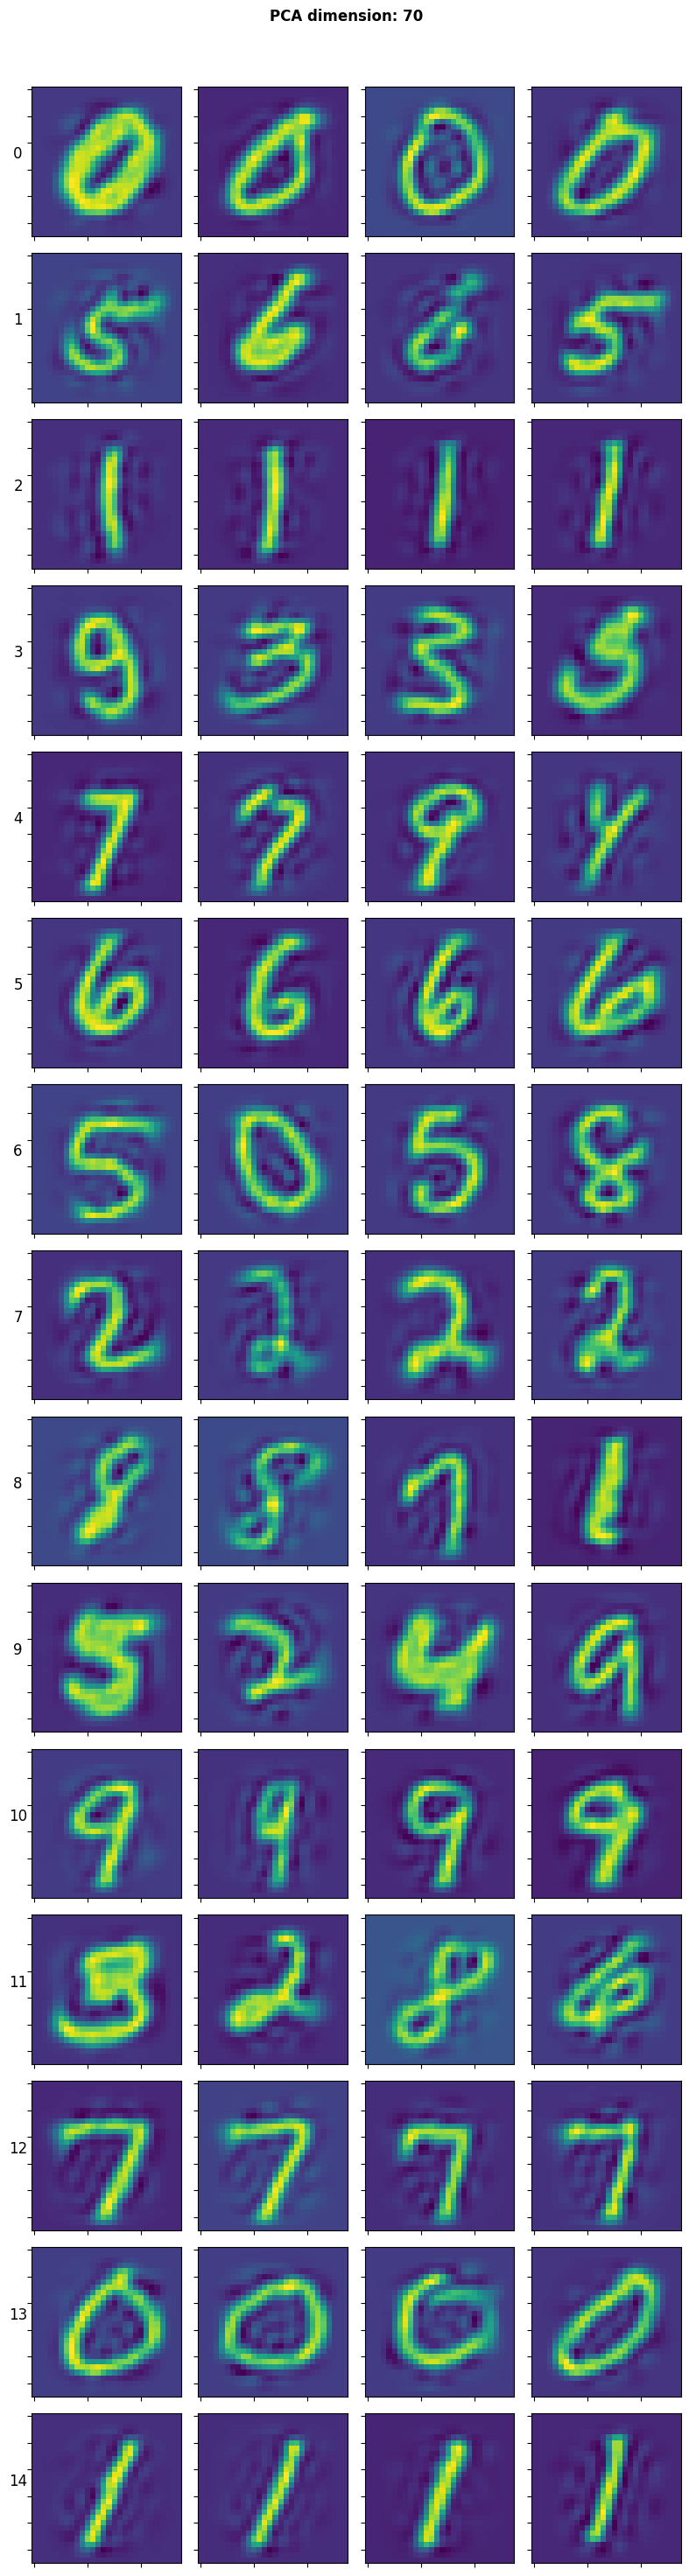

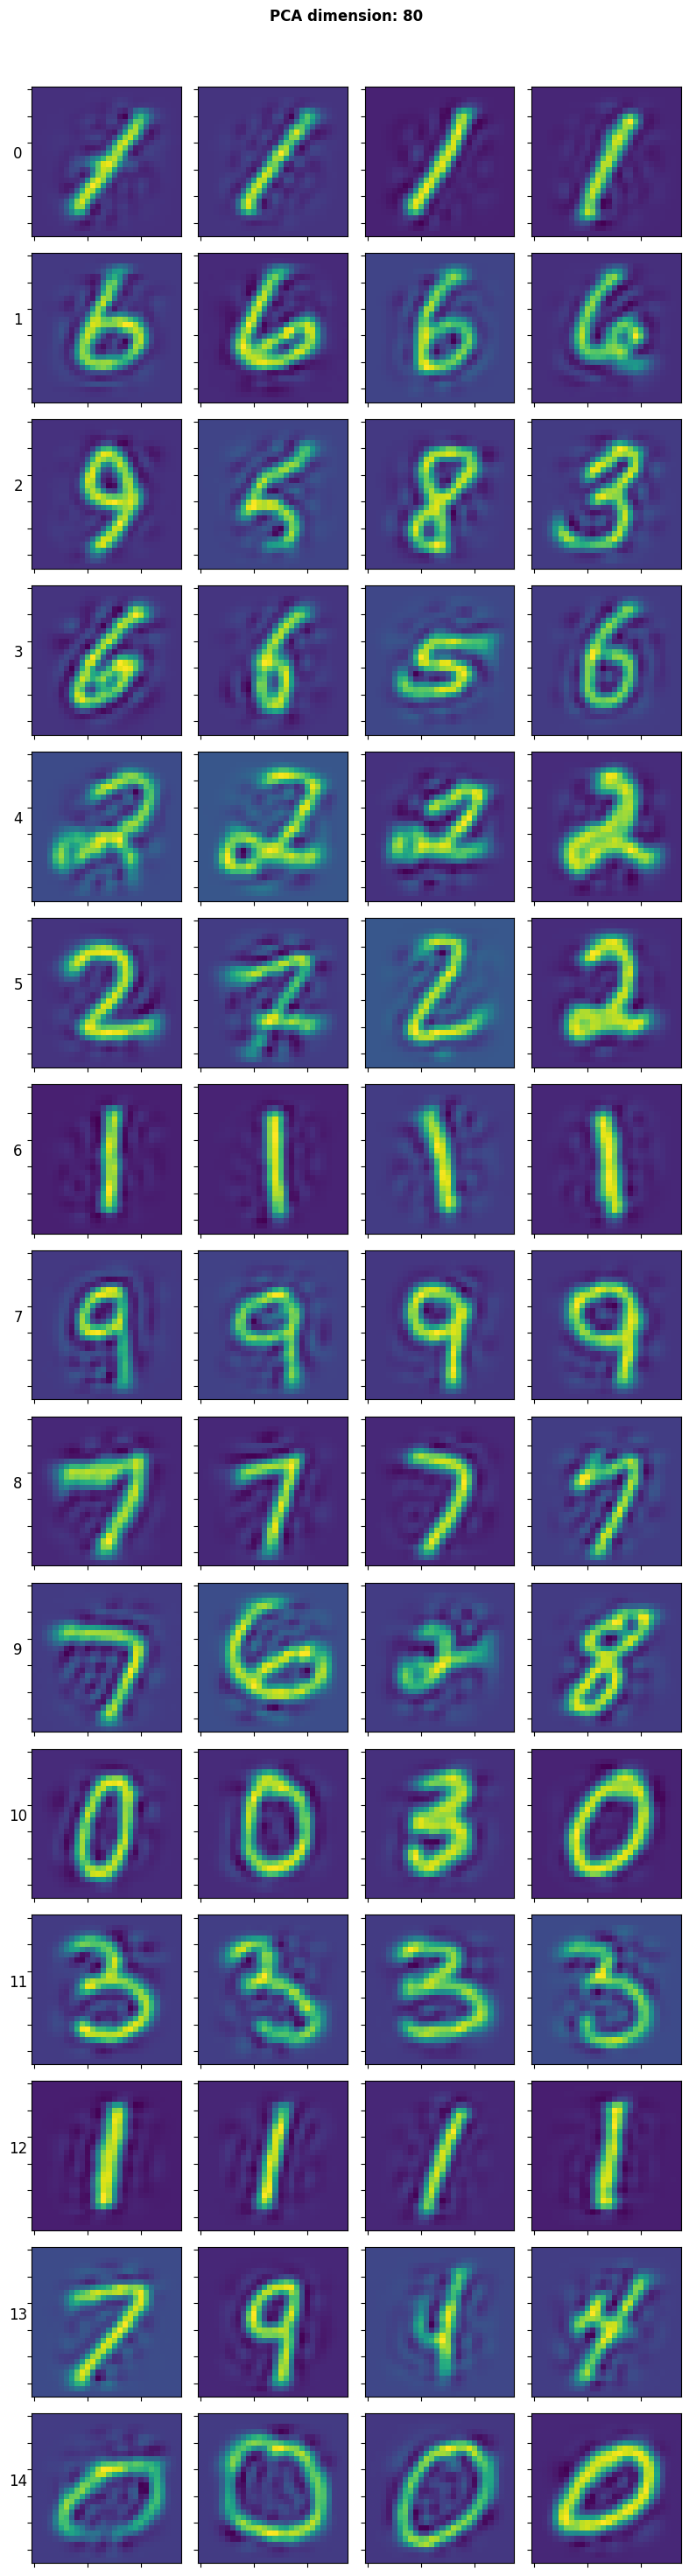

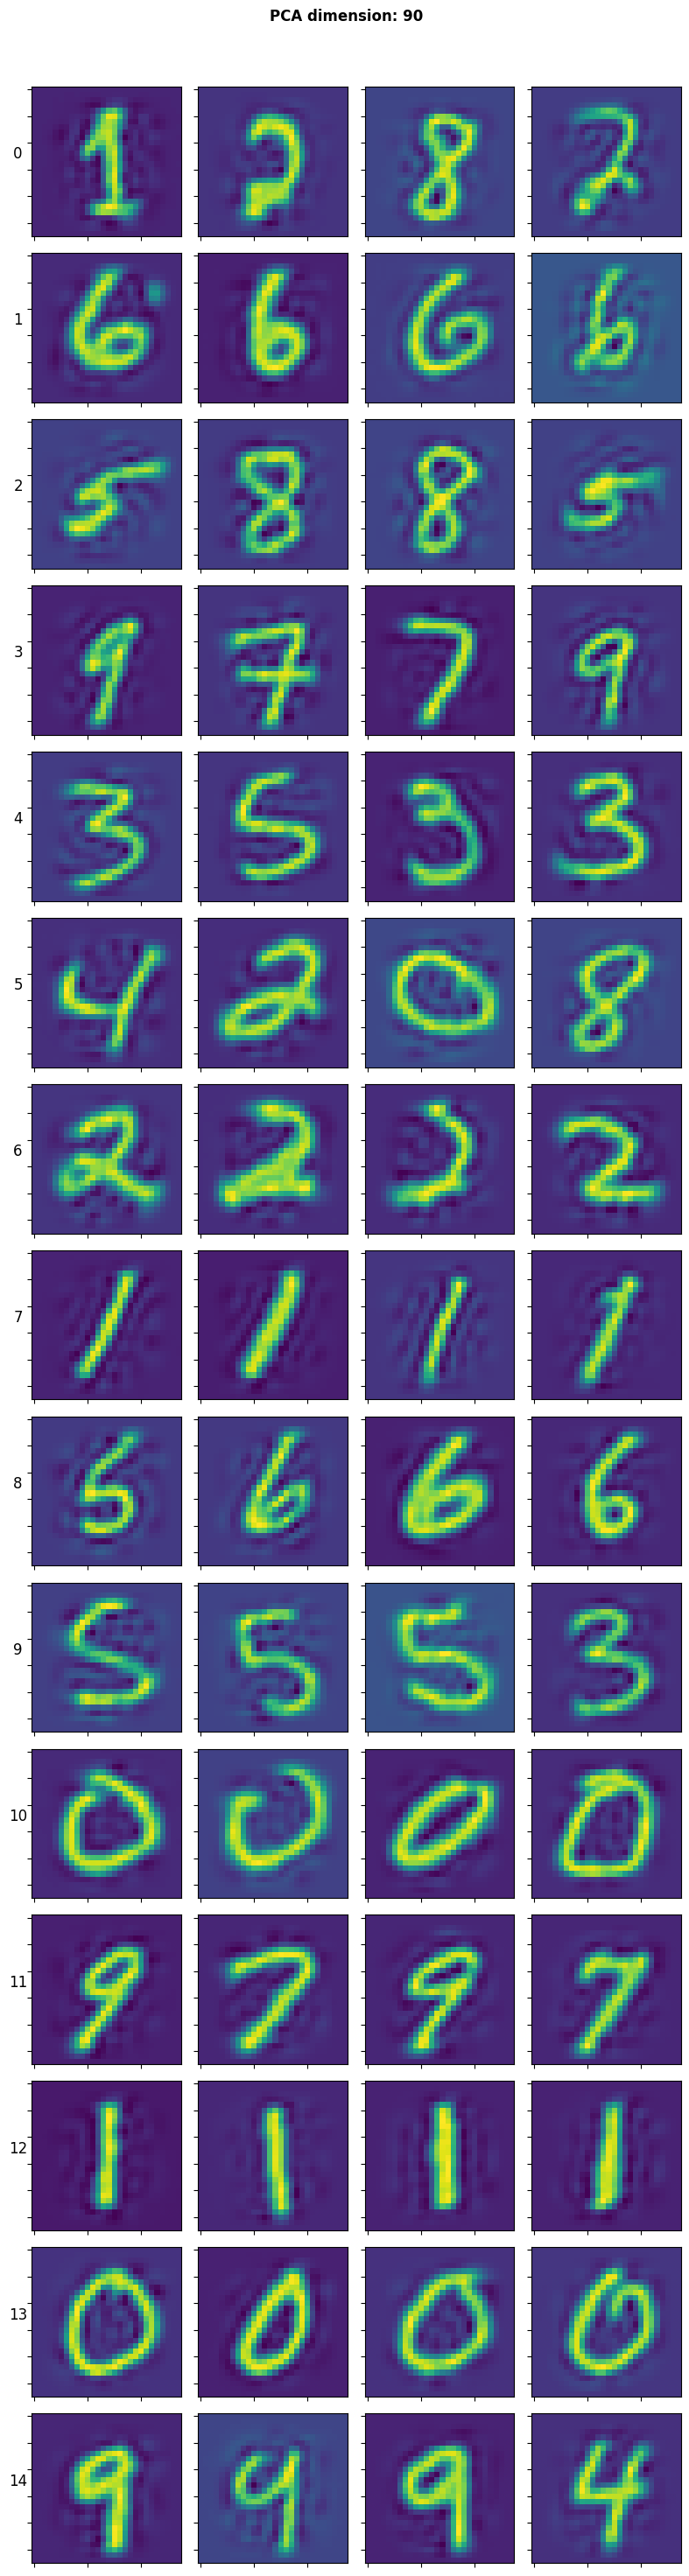

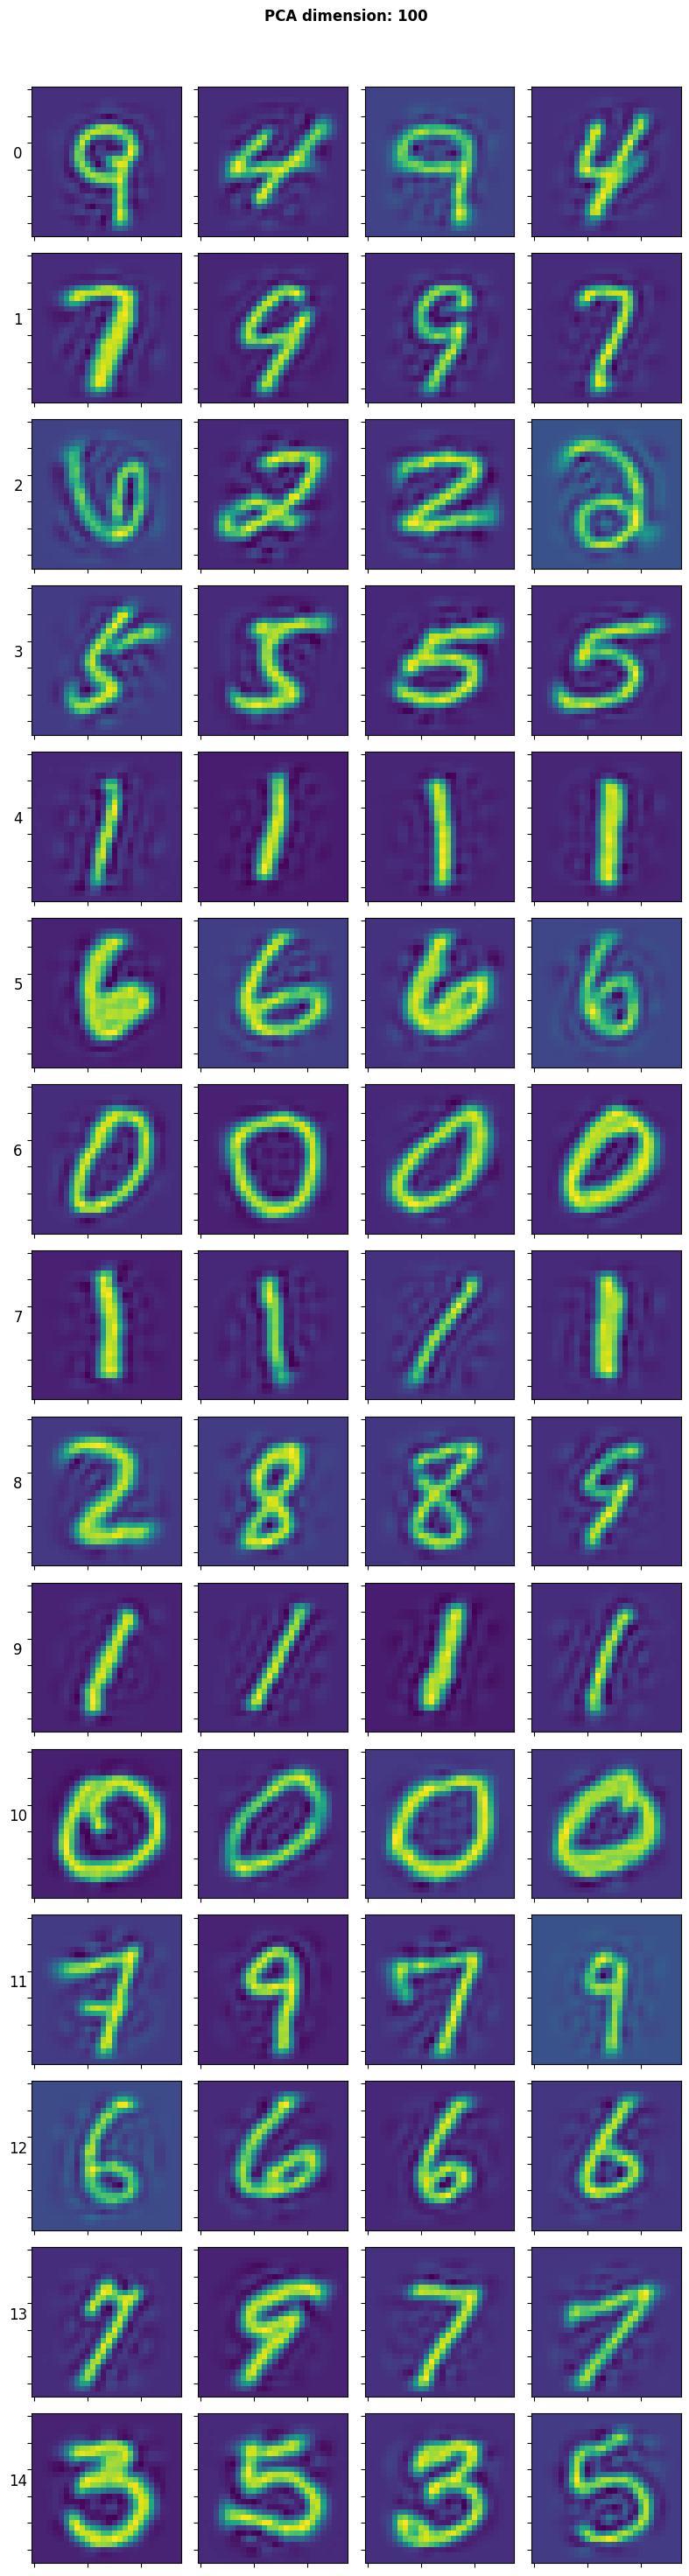

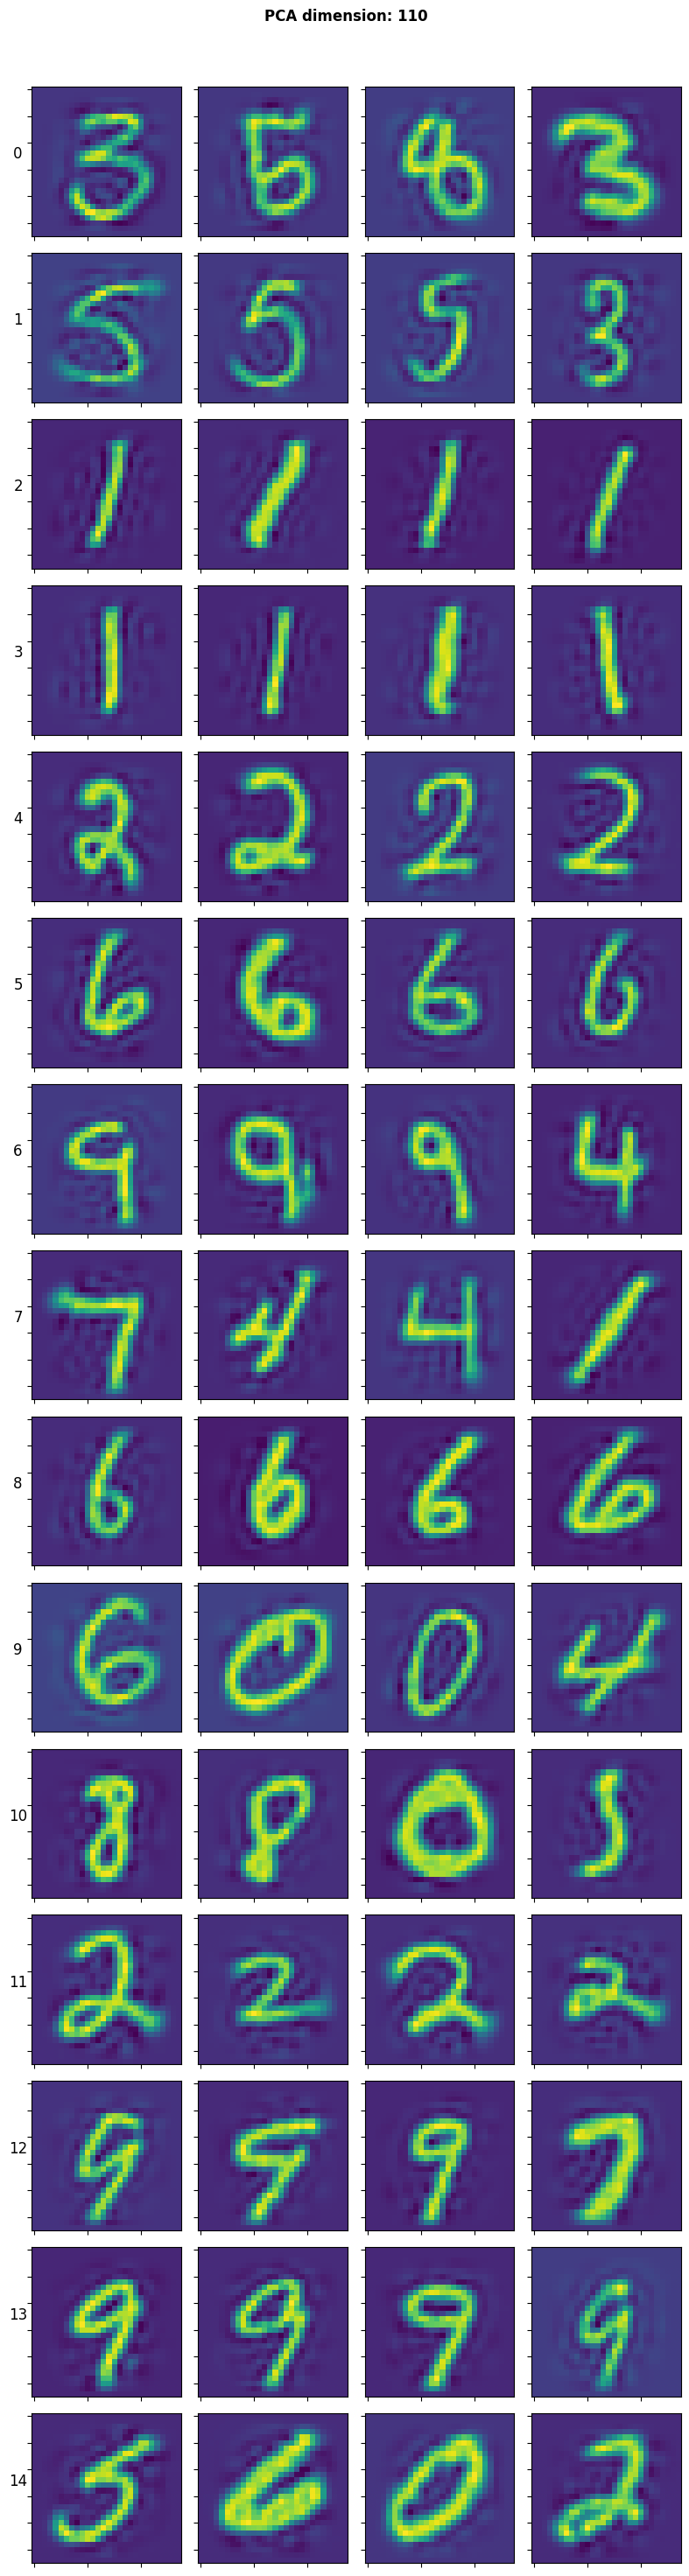

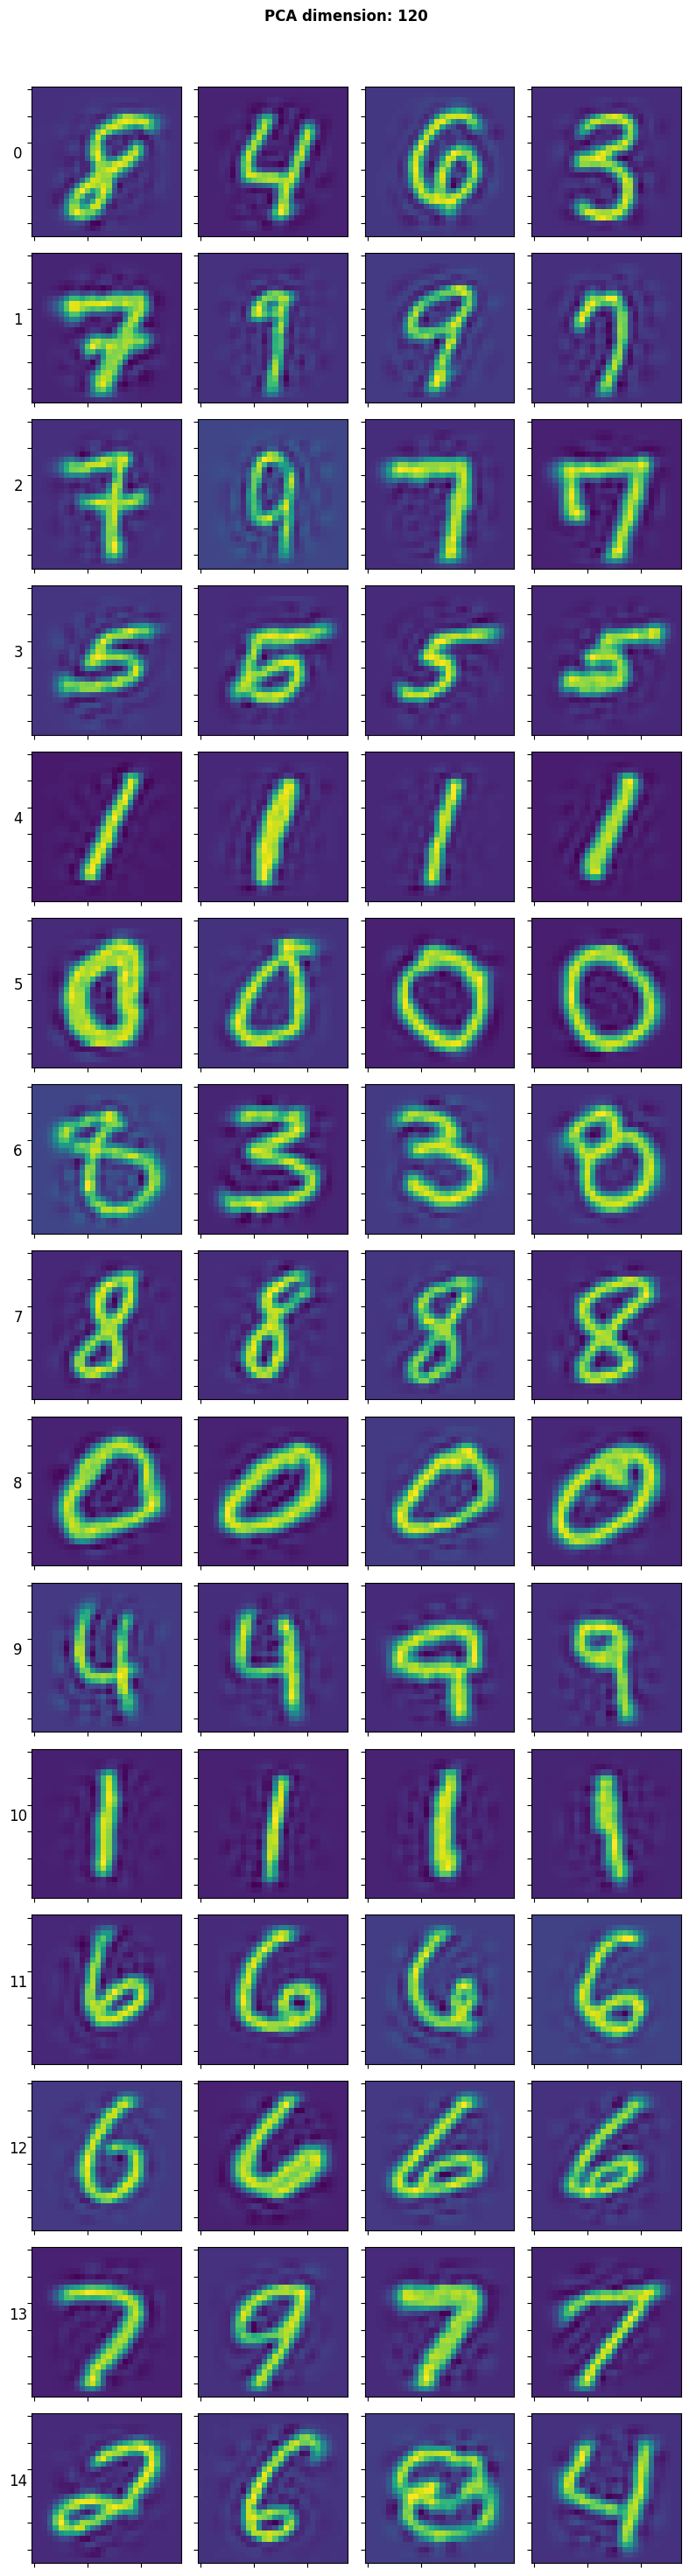

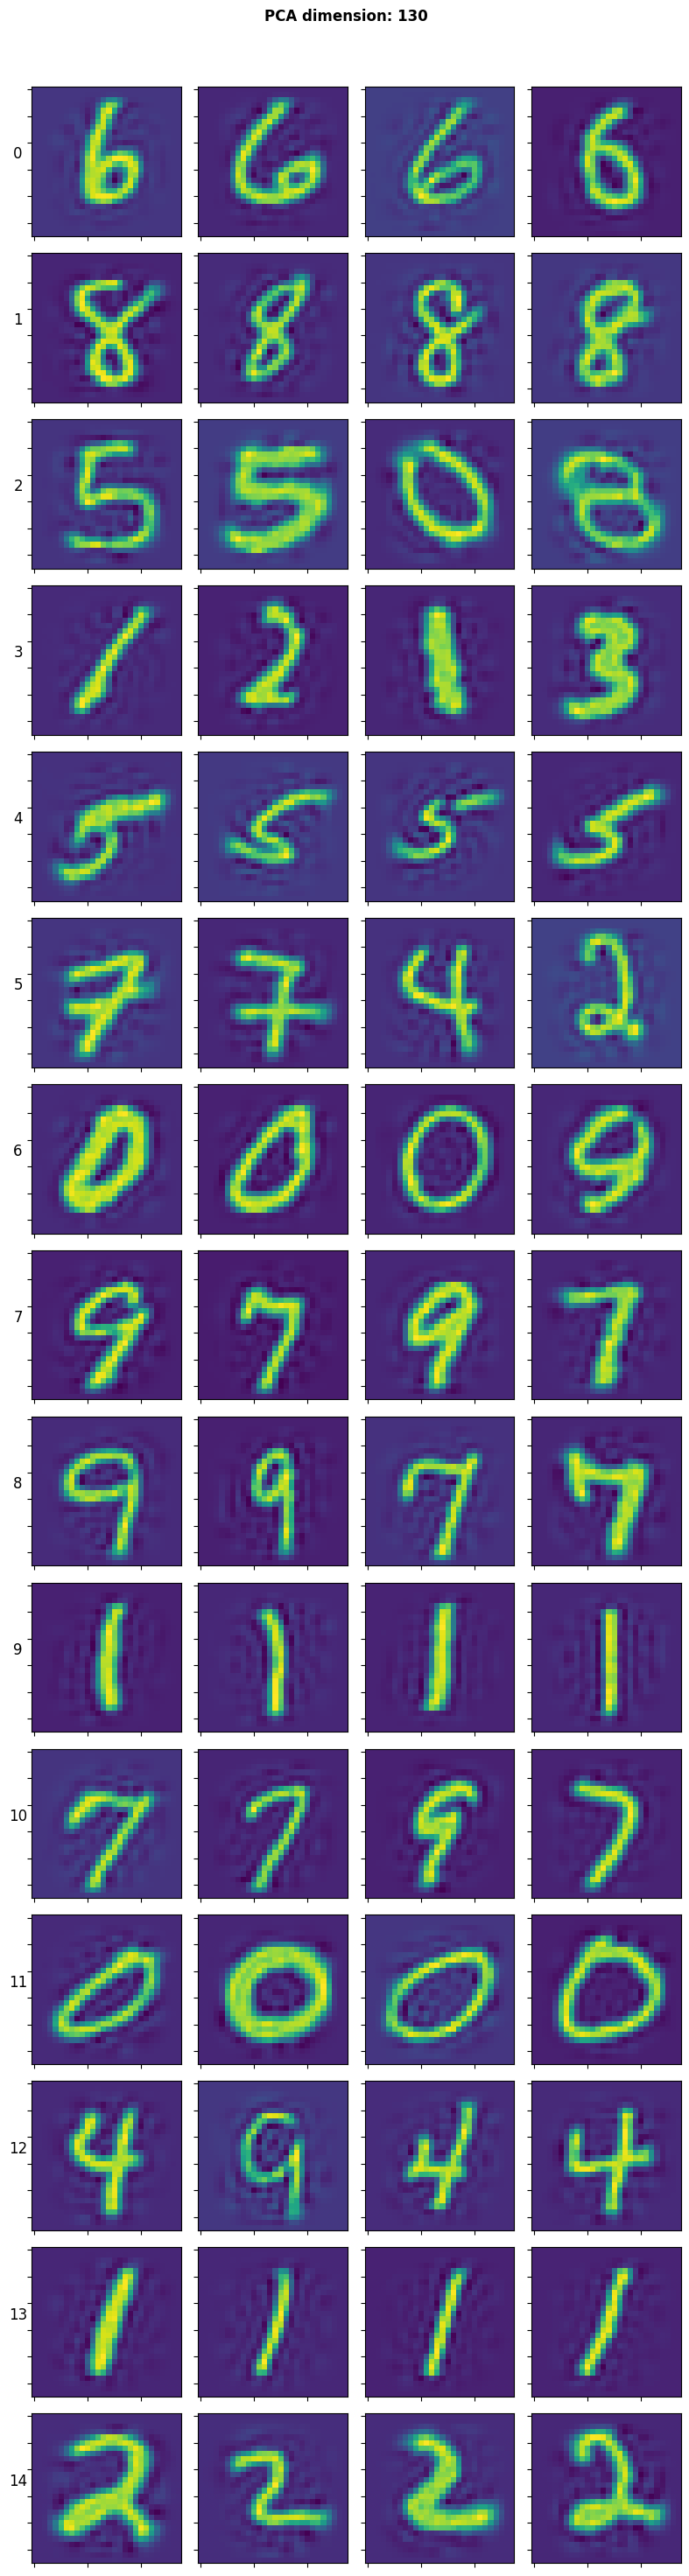

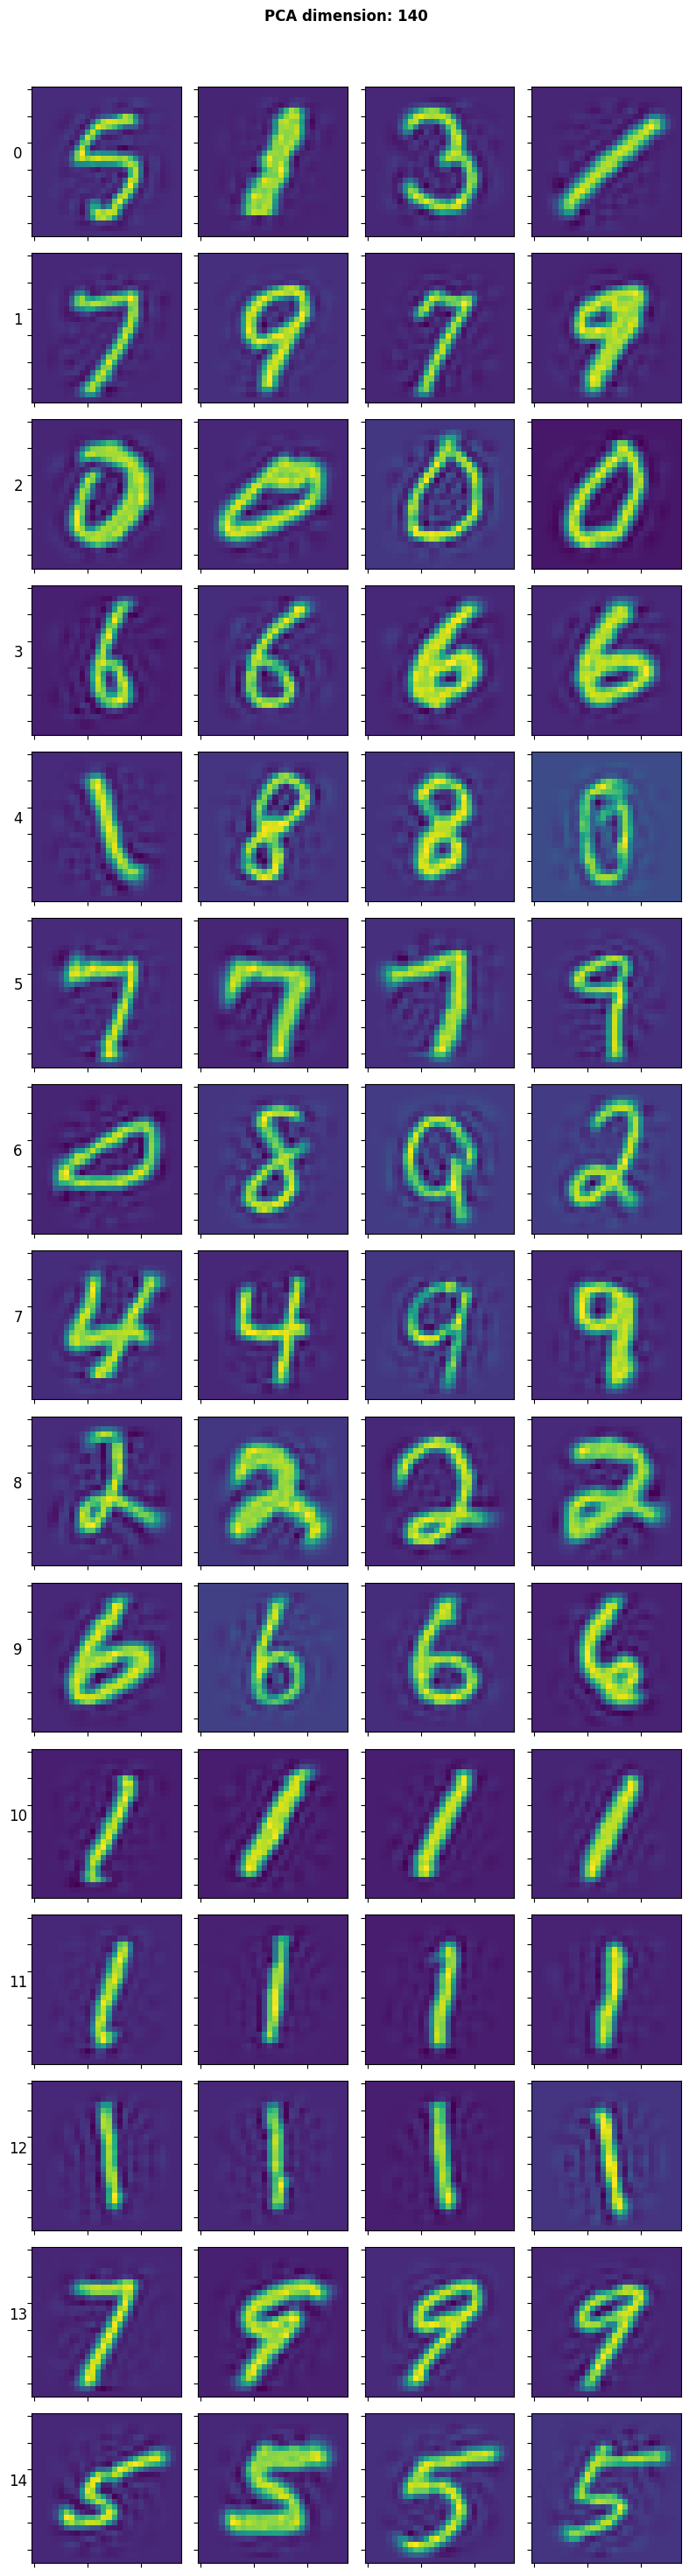

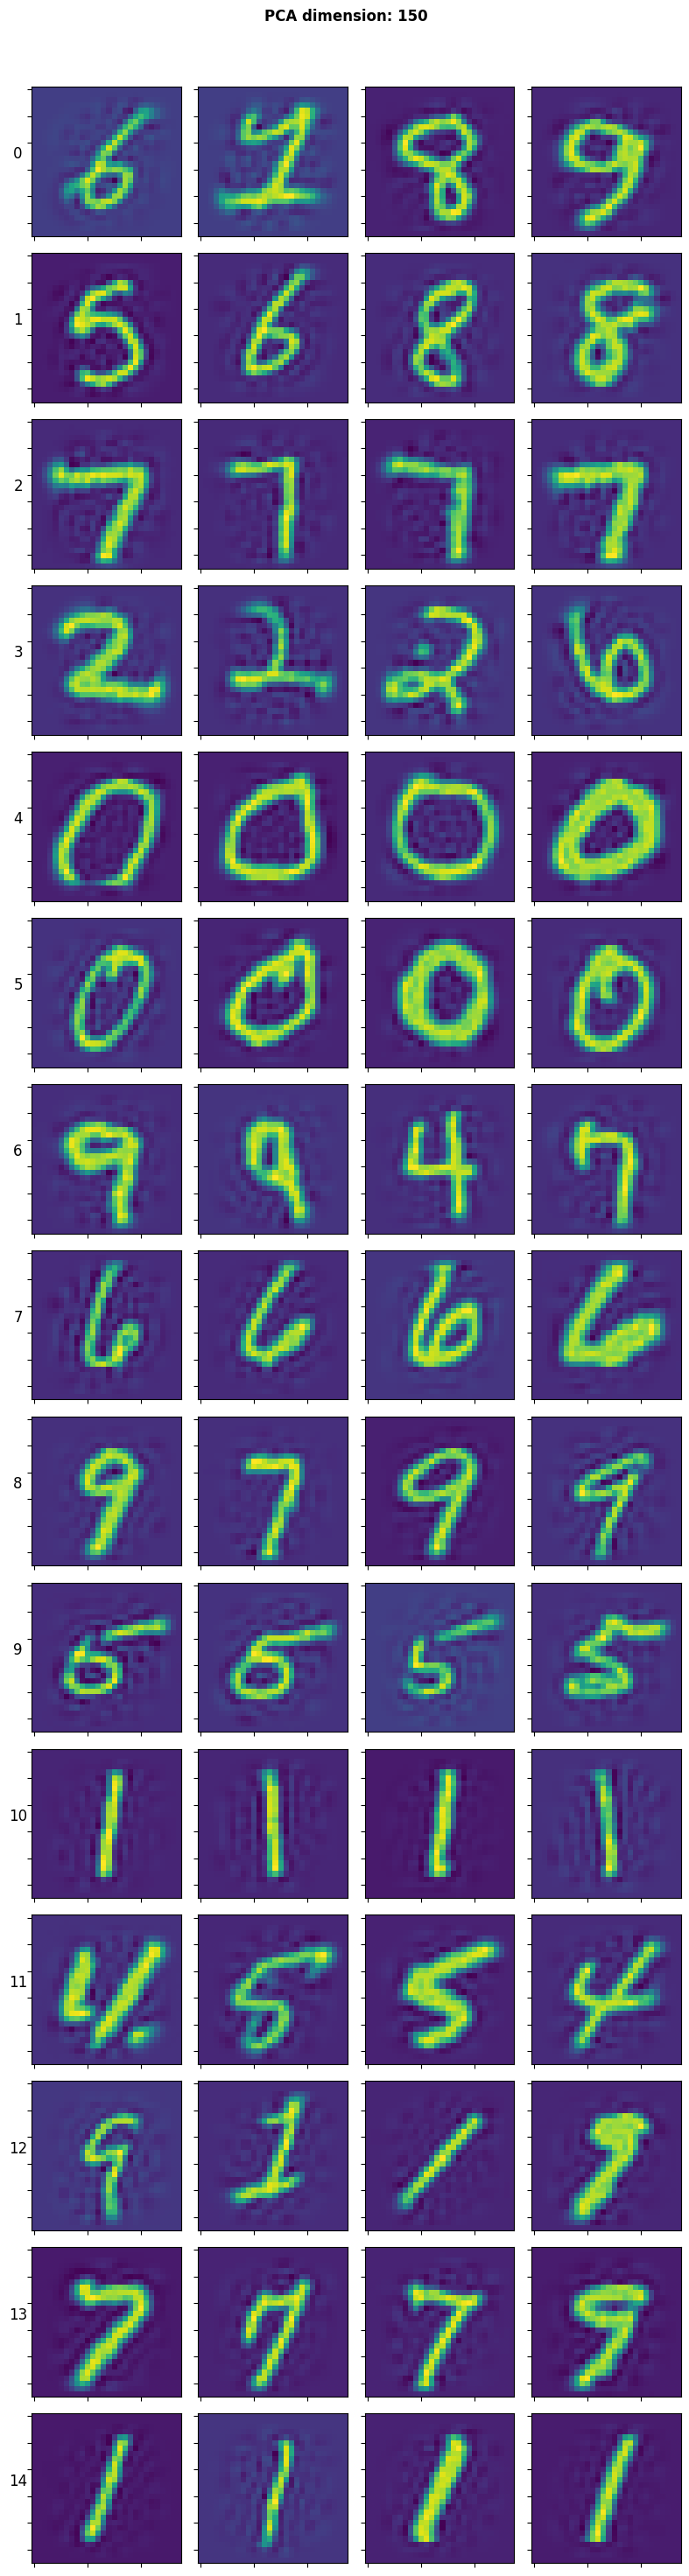

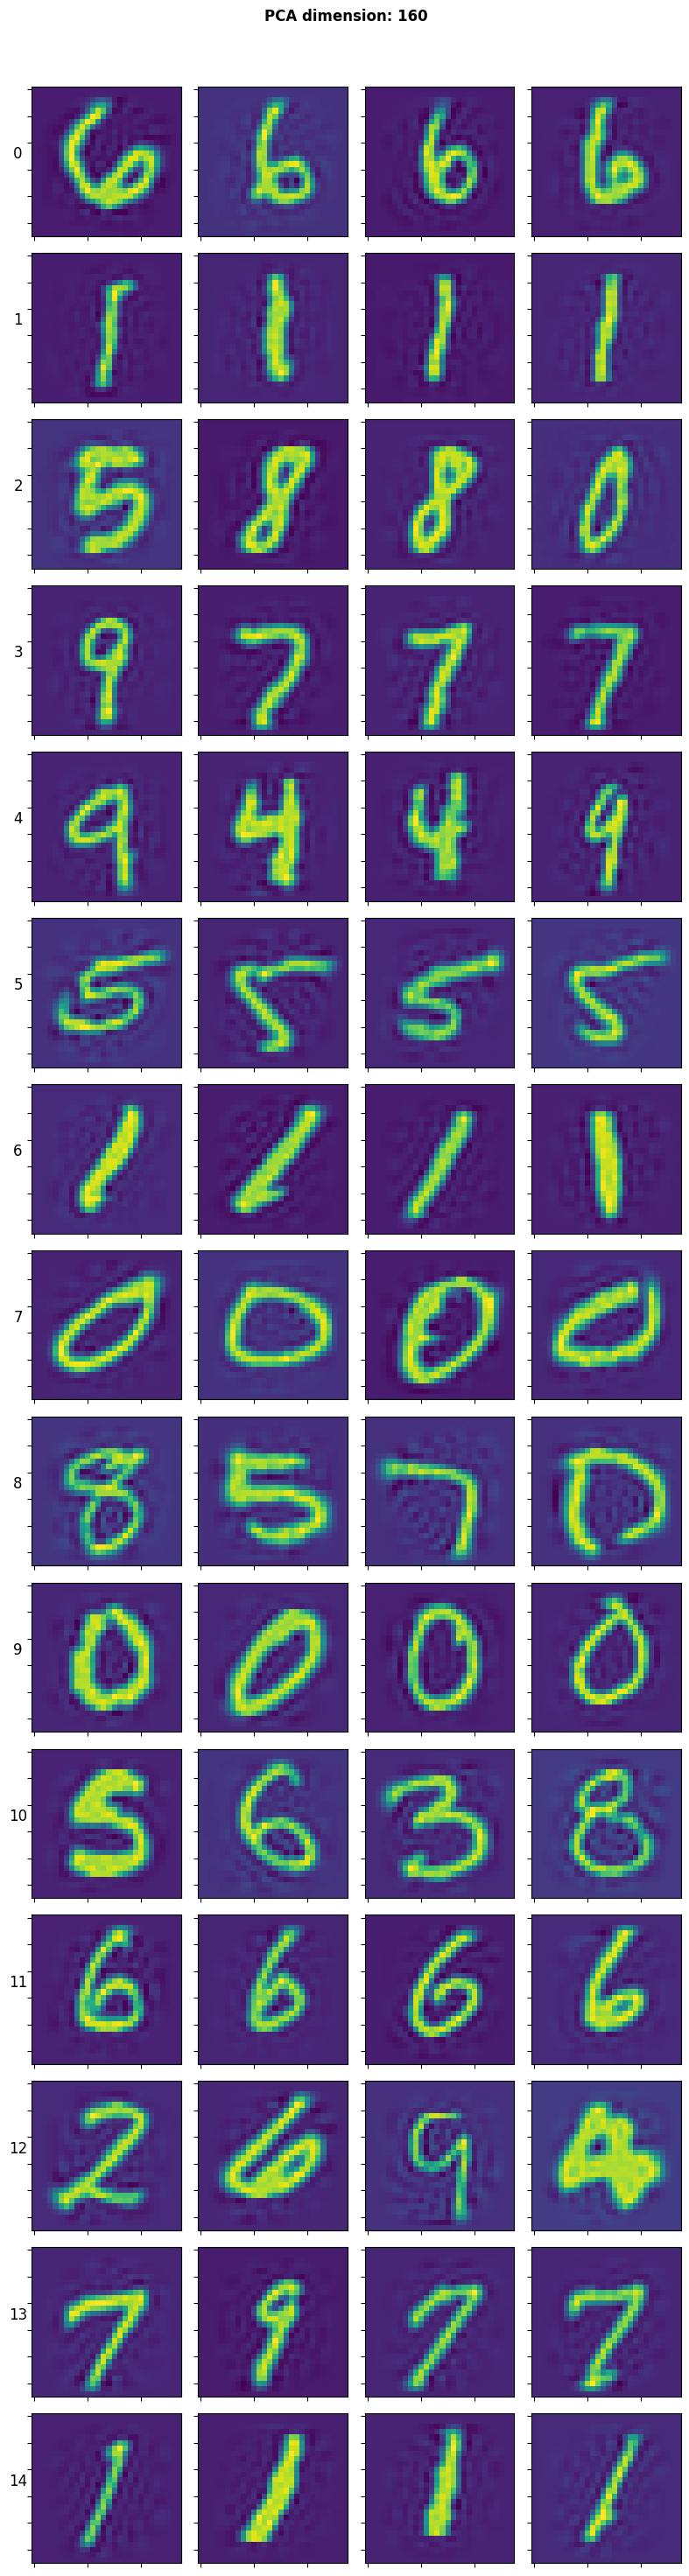

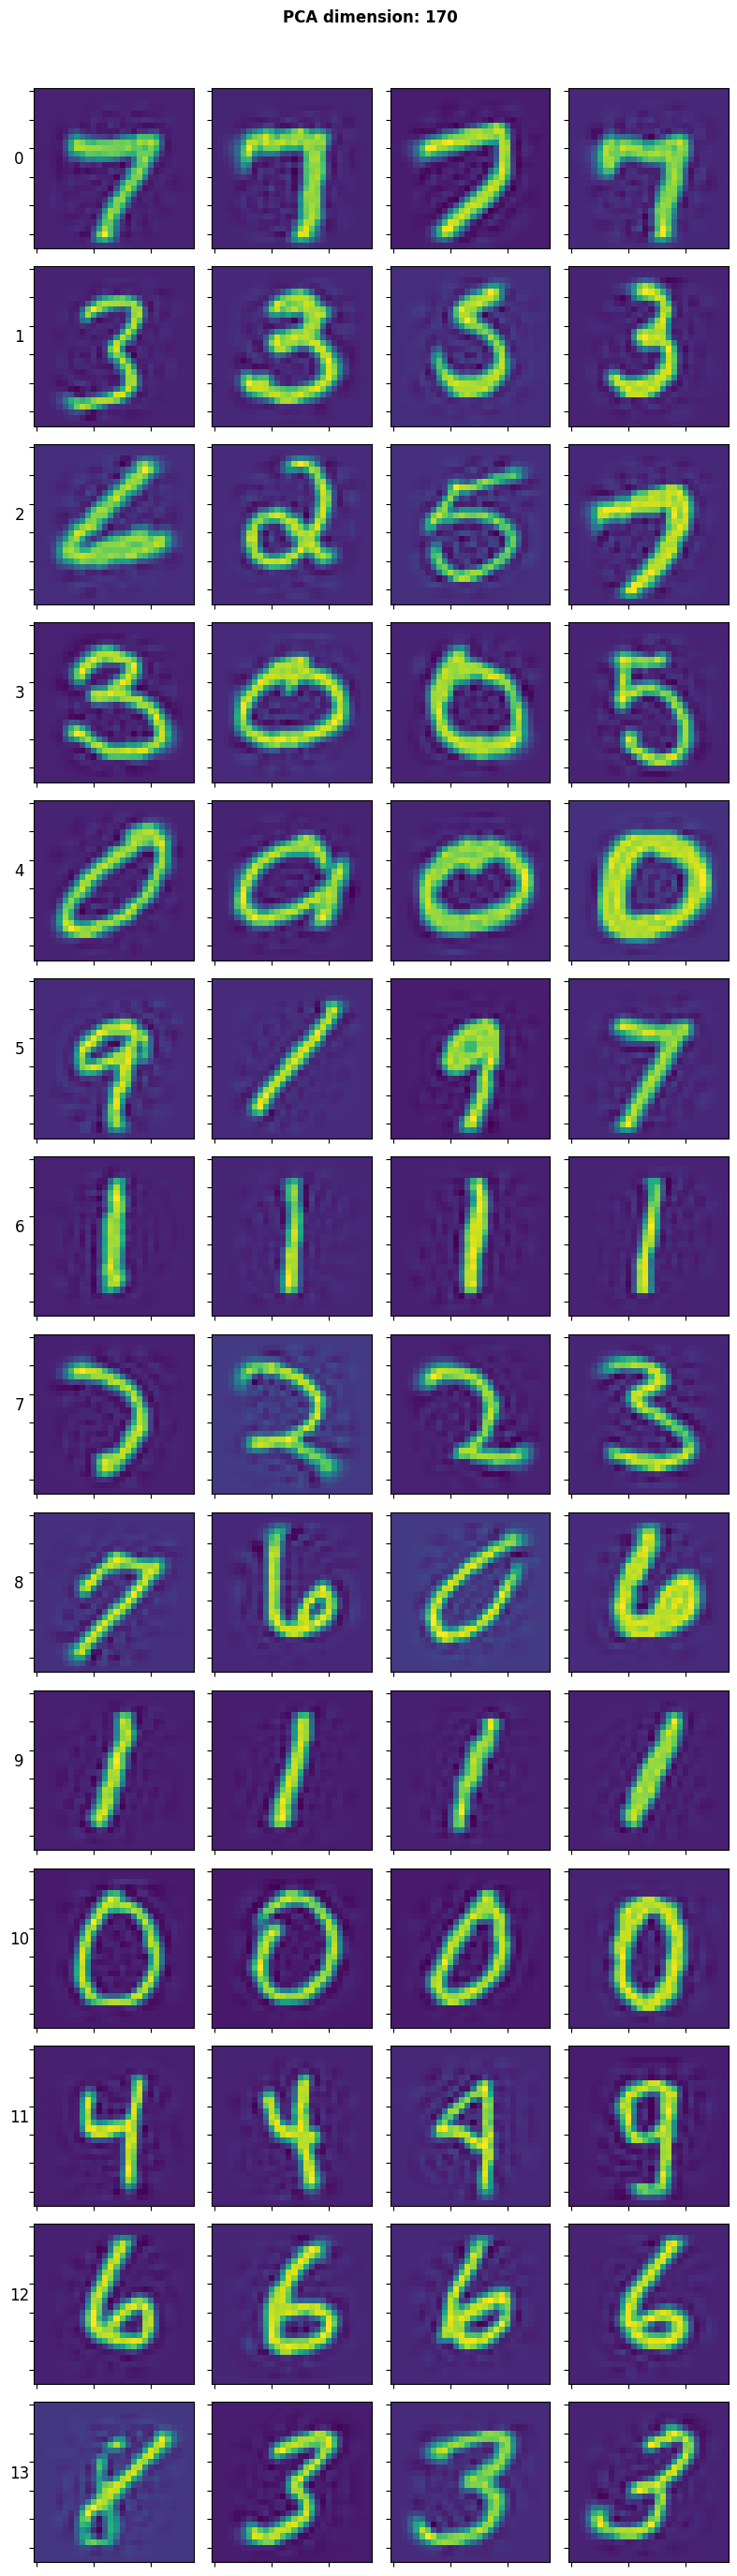

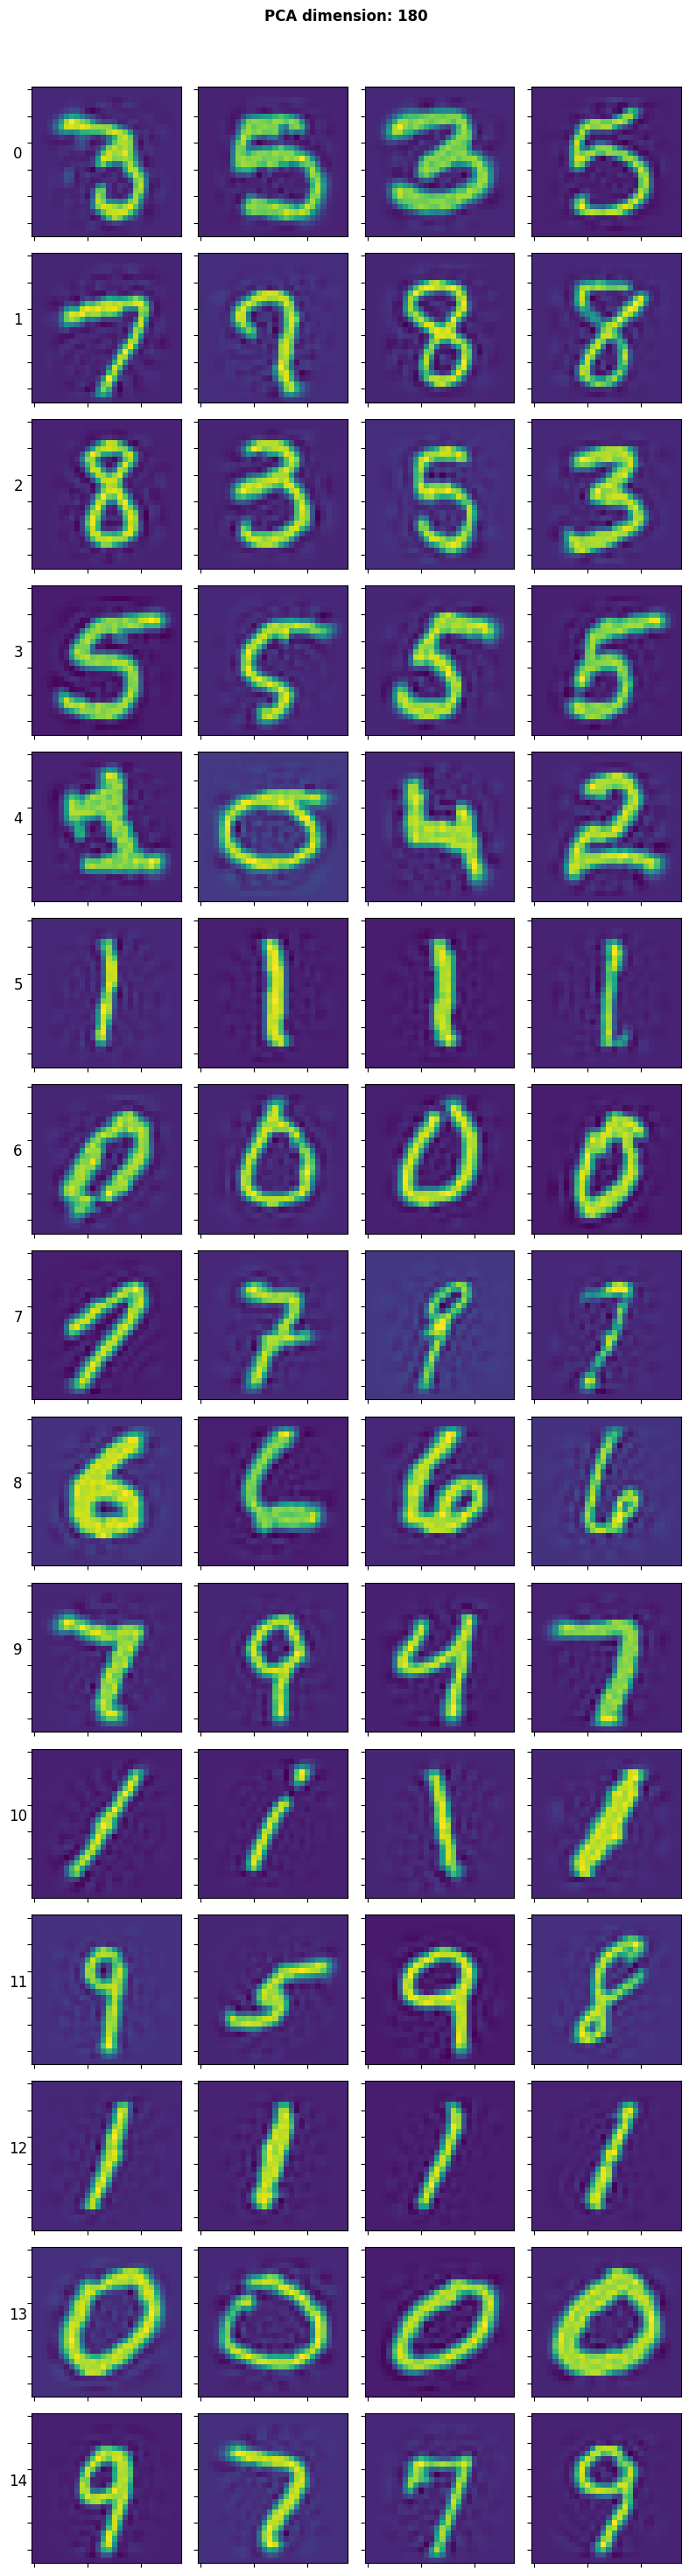

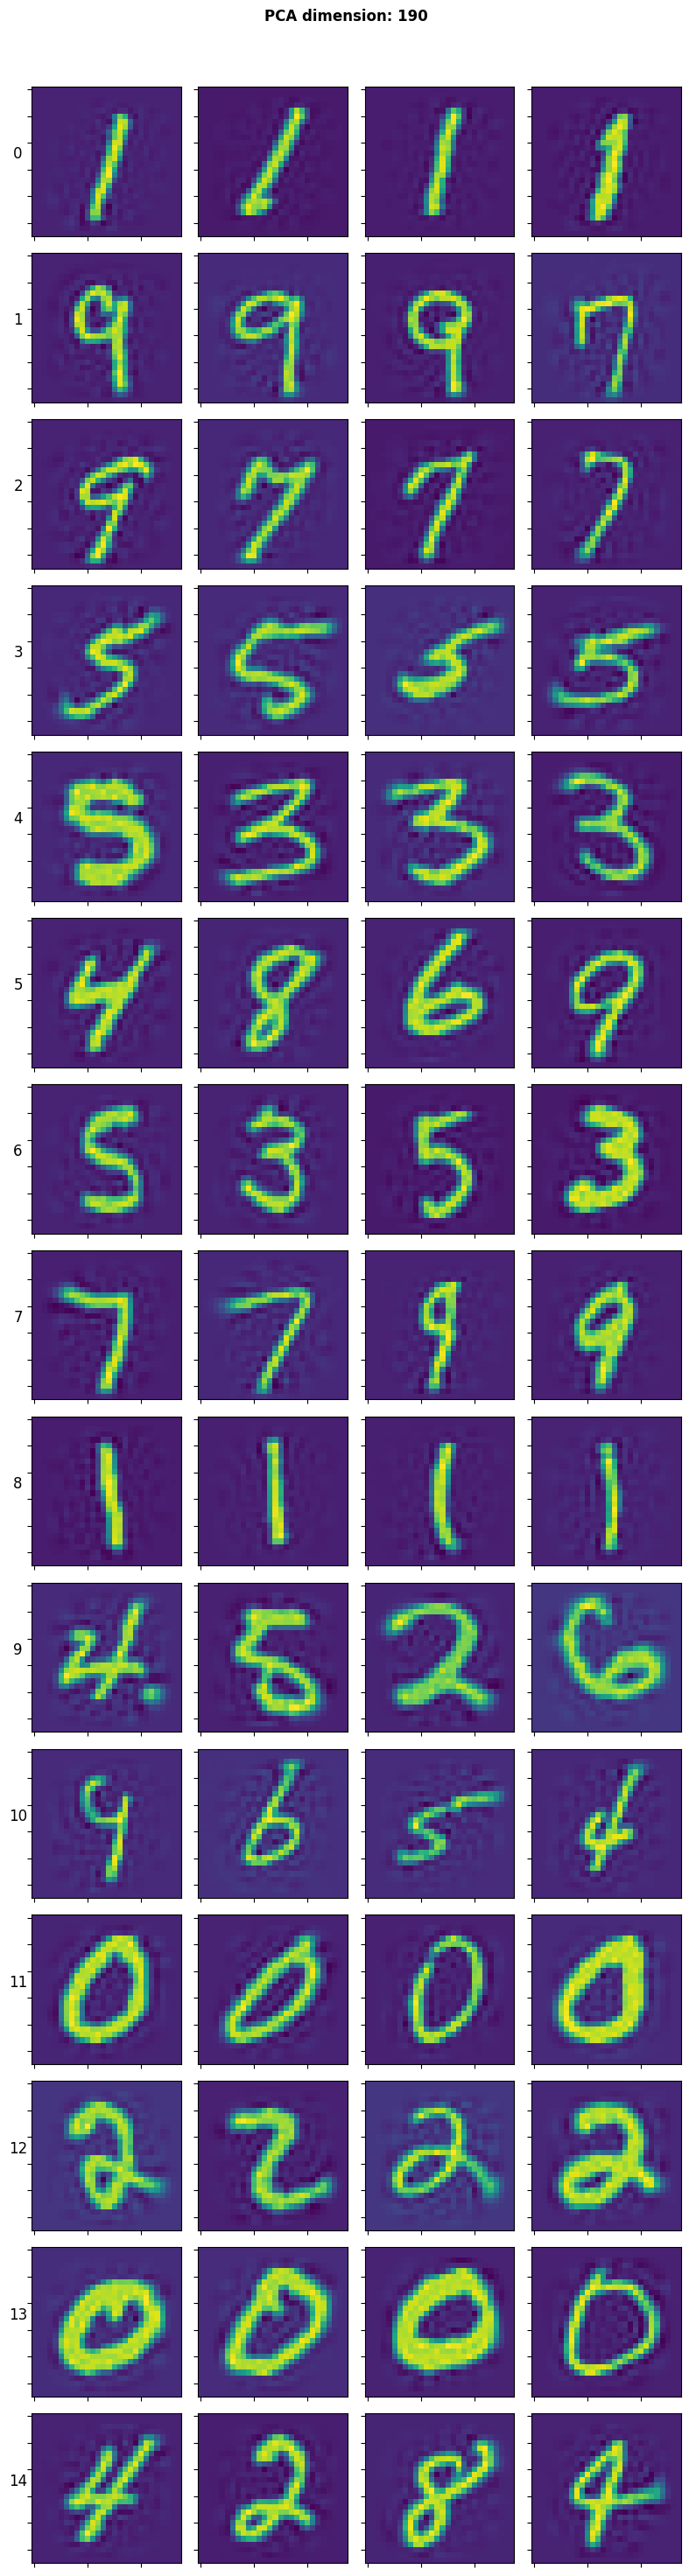

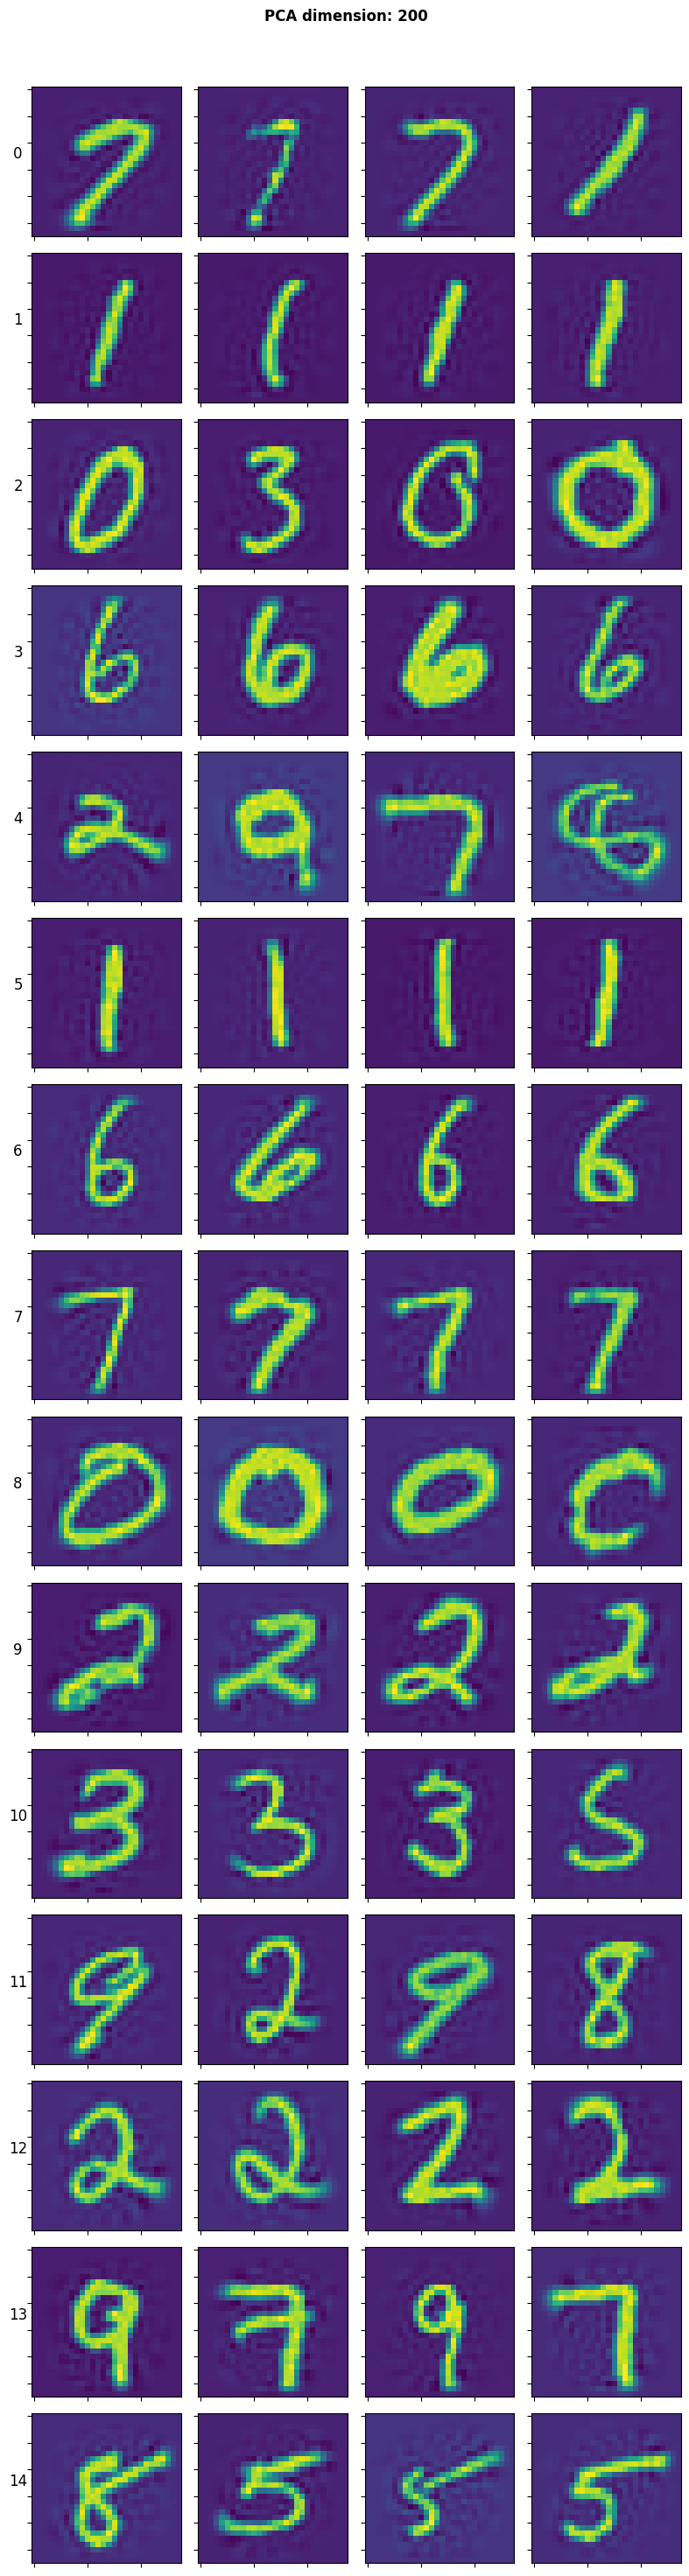

In [17]:
X_test, _ = load_PCA_test_sets(PCA_DIMENSIONS, DATASET_PERC)
i = 0

for pca_dim in PCA_DIMENSIONS:
    plot_images_per_cluster(X_test, pca_dim, labels[i], n_clusters[i], "GaussianMixture")
    i += 1